In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import metrics
from scipy import stats

In [116]:
df = pd.read_csv('Air quality index prediction.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [117]:
df.shape

(29531, 16)

In [118]:
df.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

# Data Preprocessing:

#1. checking the Null values:

In [119]:
pd.DataFrame({'Null_count':df.isnull().sum(),'Null_percent':df.isnull().sum()/len(df)*100}).sort_values('Null_percent',
                                                                                                        ascending=False)

,Null_count,Null_percent
Xylene,18109,61.322001
PM10,11140,37.723071
NH3,10328,34.973418
Toluene,8041,27.229014
Benzene,5623,19.041008
AQI,4681,15.851139
AQI_Bucket,4681,15.851139
PM2.5,4598,15.570079
NOx,4185,14.171549
O3,4022,13.619586


 Treating the Null-values:

In [120]:
df.dropna(subset = ['AQI_Bucket'],axis = 0,inplace = True)

In [121]:
df.drop('Xylene',axis = 1,inplace = True)

In [122]:
df.shape

(24850, 15)

In [123]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,914.0,Severe


In [124]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [125]:
df_temp = df[['City','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene','Date','AQI_Bucket','AQI']].copy(deep = False)
df_temp.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Date,AQI_Bucket,AQI
28,Ahmedabad,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,2015-01-29,Poor,209.0
29,Ahmedabad,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,2015-01-30,Very Poor,328.0
30,Ahmedabad,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,2015-01-31,Severe,514.0
31,Ahmedabad,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,2015-02-01,Severe,782.0
32,Ahmedabad,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,2015-02-02,Severe,914.0


In [127]:
df_temp.dropna(thresh = 6,axis = 0,inplace = True)

In [128]:
df_temp.shape

(24801, 15)

In [129]:
pd.DataFrame({'Null_count':df_temp.isnull().sum(),'Null_percent':df_temp.isnull().sum()/len(df_temp)*100}).sort_values('Null_percent',
                                                                                                                      ascending=False)

,Null_count,Null_percent
PM10,7037,28.373856
NH3,6487,26.156203
Toluene,5777,23.293416
Benzene,3486,14.055885
NOx,1808,7.290029
O3,758,3.056328
PM2.5,629,2.536188
SO2,556,2.241845
CO,396,1.596710
NO2,342,1.378977


In [130]:
df_temp.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Date,AQI_Bucket,AQI
28,Ahmedabad,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,2015-01-29,Poor,209.0
29,Ahmedabad,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,2015-01-30,Very Poor,328.0
30,Ahmedabad,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,2015-01-31,Severe,514.0
31,Ahmedabad,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,2015-02-01,Severe,782.0
32,Ahmedabad,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,2015-02-02,Severe,914.0


In [131]:
df_temp.isnull().sum() / len(df) * 100

City           0.000000
PM2.5          2.531187
PM10          28.317907
NO             1.360161
NO2            1.376258
NOx            7.275654
NH3           26.104628
CO             1.593561
SO2            2.237425
O3             3.050302
Benzene       14.028169
Toluene       23.247485
Date           0.000000
AQI_Bucket     0.000000
AQI            0.000000
dtype: float64

In [132]:
df_temp.dtypes

City           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Date           object
AQI_Bucket     object
AQI           float64
dtype: object

In [133]:
import datetime
import calendar

In [134]:
b=[]
for i in df_temp['Date']:
    born=datetime.datetime.strptime(i,'%Y-%m-%d').weekday()
    b.append(born)

In [135]:
n=[]
for i in b:
    n.append(calendar.day_name[i])

In [136]:
df_temp['day']=n

In [137]:
df_temp.drop('Date',axis=1,inplace=True)

In [138]:
df_temp.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket,AQI,day
28,Ahmedabad,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,Poor,209.0,Thursday
29,Ahmedabad,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,Very Poor,328.0,Friday
30,Ahmedabad,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,Severe,514.0,Saturday
31,Ahmedabad,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,Severe,782.0,Sunday
32,Ahmedabad,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,Severe,914.0,Monday


In [139]:
df_temp['day']=['Weekend' if (i=='Saturday') | (i=='Sunday') else 'weekday' for i in df_temp['day']]

In [140]:
df_temp.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket,AQI,day
28,Ahmedabad,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,Poor,209.0,weekday
29,Ahmedabad,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,Very Poor,328.0,weekday
30,Ahmedabad,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,Severe,514.0,Weekend
31,Ahmedabad,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,Severe,782.0,Weekend
32,Ahmedabad,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,Severe,914.0,weekday


In [141]:
df_temp.isnull().sum()/len(df_temp)*100

City           0.000000
PM2.5          2.536188
PM10          28.373856
NO             1.362848
NO2            1.378977
NOx            7.290029
NH3           26.156203
CO             1.596710
SO2            2.241845
O3             3.056328
Benzene       14.055885
Toluene       23.293416
AQI_Bucket     0.000000
AQI            0.000000
day            0.000000
dtype: float64

In [142]:
df_num=df_temp.select_dtypes('number')

In [143]:
df_num.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,24801.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,166.573525
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,140.779380
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,2049.000000


In [1]:
# Since within cities daywise there is a good correlation, choosing to go with Iterative imputer

In [145]:
impute=IterativeImputer()
imputed=impute.fit_transform(df_num)
df_num_imp=pd.DataFrame(imputed,columns=df_num.columns)

In [146]:
df_num_imp.isnull().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

In [147]:
df_num_imp.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000,24801.000000
mean,67.272363,132.581144,17.536952,28.885007,31.550038,25.198094,2.317946,14.351834,34.855996,3.424154,9.078966,166.573525
std,62.862809,99.782610,22.323605,24.522192,29.968115,23.905145,7.032344,17.303796,21.455073,14.934546,19.065835,140.779380
min,-8.805253,-1103.996215,-8.011376,-2.160222,-1.666883,-65.263504,-12.756657,0.010000,-38.029044,-7.489898,-15.680993,13.000000
25%,28.910000,65.700000,5.640000,11.970000,13.350000,10.710000,0.580000,5.790000,19.580000,0.320000,1.390000,81.000000
50%,48.640000,104.900000,9.920000,22.070000,23.000000,20.377524,0.930000,9.320000,31.240000,1.690000,4.440000,118.000000
75%,80.640000,168.360000,19.950000,38.050000,38.754588,32.140000,1.480000,15.170000,45.640000,3.520000,9.910000,208.000000
max,914.940000,919.620757,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,2049.000000


In [148]:
df_num_imp.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,83.13,121.720342,6.93,28.71,33.72,20.925162,6.93,49.52,59.76,0.02,0.00,209.0
1,79.84,129.655658,13.85,28.68,41.08,28.699620,13.85,48.49,97.07,0.04,0.00,328.0
2,94.52,159.528786,24.39,32.66,52.61,35.619084,24.39,67.39,111.33,0.24,0.01,514.0
3,135.99,180.209053,43.48,42.08,84.57,57.146057,43.48,75.23,102.70,0.40,0.04,782.0
4,178.33,189.538483,54.56,35.31,72.80,81.066749,54.56,55.04,107.38,0.46,0.06,914.0


In [149]:
df_cat=df_temp.select_dtypes('object')

In [150]:
df_cat.head()

,City,AQI_Bucket,day
28,Ahmedabad,Poor,weekday
29,Ahmedabad,Very Poor,weekday
30,Ahmedabad,Severe,Weekend
31,Ahmedabad,Severe,Weekend
32,Ahmedabad,Severe,weekday


In [151]:
df_num_imp.shape

(24801, 12)

In [152]:
df_temp.shape

(24801, 15)

In [153]:
df_cat=df_cat.reset_index()

In [154]:
df1=pd.concat([df_num_imp,df_cat],axis=1)

In [155]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,index,City,AQI_Bucket,day
0,83.13,121.720342,6.93,28.71,33.72,20.925162,6.93,49.52,59.76,0.02,0.00,209.0,28,Ahmedabad,Poor,weekday
1,79.84,129.655658,13.85,28.68,41.08,28.699620,13.85,48.49,97.07,0.04,0.00,328.0,29,Ahmedabad,Very Poor,weekday
2,94.52,159.528786,24.39,32.66,52.61,35.619084,24.39,67.39,111.33,0.24,0.01,514.0,30,Ahmedabad,Severe,Weekend
3,135.99,180.209053,43.48,42.08,84.57,57.146057,43.48,75.23,102.70,0.40,0.04,782.0,31,Ahmedabad,Severe,Weekend
4,178.33,189.538483,54.56,35.31,72.80,81.066749,54.56,55.04,107.38,0.46,0.06,914.0,32,Ahmedabad,Severe,weekday


# Univariate Analysis:

#1. PM2.5

count    24801.000000
mean        67.272363
std         62.862809
min         -8.805253
25%         28.910000
50%         48.640000
75%         80.640000
max        914.940000
Name: PM2.5, dtype: float64


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

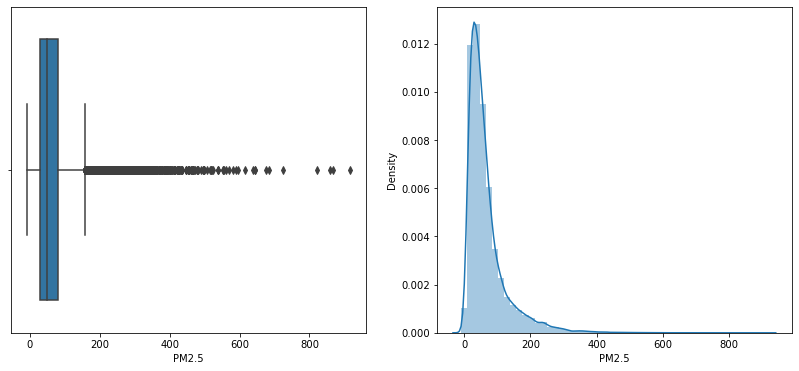

In [156]:
print(df1['PM2.5'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['PM2.5'])
plt.subplot(1,2,2)
sns.distplot(df1['PM2.5'])

In [157]:
q1=df1['PM2.5'].quantile(0.25)
q3=df1['PM2.5'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
print('Percentage of Outliers in the PM2.5:',df1[df1['PM2.5']>ul].shape[0]/len(df1)*100)

Percentage of Outliers in the PM2.5: 7.971452764001452


#Observation

#1. There are Outliers in the dataset which makes the distribution right skewed

#2. The 75% of the data has less than 85 ppm.

#3. On the procedding furthur the Ouliers must be treated or take required action for better model performance

#4. 7% of the data are outliers in this feauture.

#1. PM10

count    24801.000000
mean       132.581144
std         99.782610
min      -1103.996215
25%         65.700000
50%        104.900000
75%        168.360000
max        919.620757
Name: PM10, dtype: float64


<AxesSubplot:xlabel='PM10', ylabel='Density'>

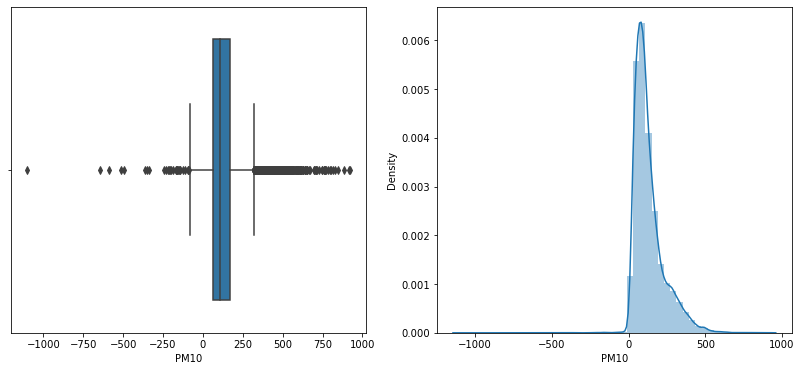

In [158]:
print(df1['PM10'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['PM10'])
plt.subplot(1,2,2)
sns.distplot(df1['PM10'])

In [159]:
q1=df1['PM10'].quantile(0.25)
q3=df1['PM10'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the PM10:',df1[(df1['PM10']>ul)|(df1['PM10']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the PM10: 6.136849320591912


 Observation:

#1. 6% of the data are outliers in the feature

#2. Most of the Outliers are on the right side which causes the distribution right skewed

#Nitric oxide:

count    24801.000000
mean        17.536952
std         22.323605
min         -8.011376
25%          5.640000
50%          9.920000
75%         19.950000
max        390.680000
Name: NO, dtype: float64


<AxesSubplot:xlabel='NO', ylabel='Density'>

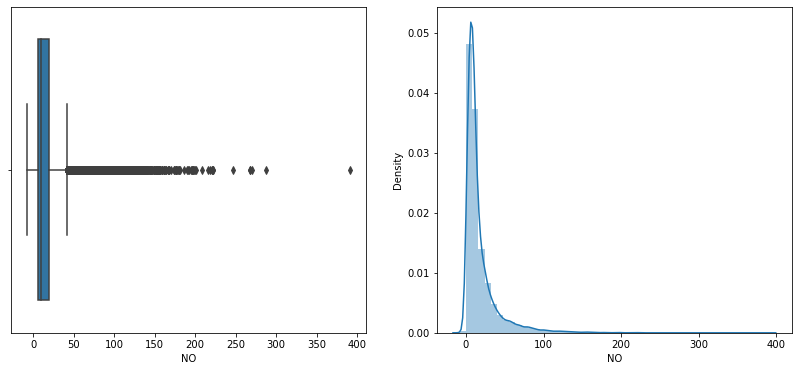

In [160]:
print(df1['NO'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['NO'])
plt.subplot(1,2,2)
sns.distplot(df1['NO'])

In [161]:
q1=df1['NO'].quantile(0.25)
q3=df1['NO'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the NO:',df1[(df1['NO']>ul)|(df1['NO']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the NO: 9.543970001209628


#Nitrogen dioxide(NO2)

count    24801.000000
mean        28.885007
std         24.522192
min         -2.160222
25%         11.970000
50%         22.070000
75%         38.050000
max        362.210000
Name: NO2, dtype: float64


<AxesSubplot:xlabel='NO2', ylabel='Density'>

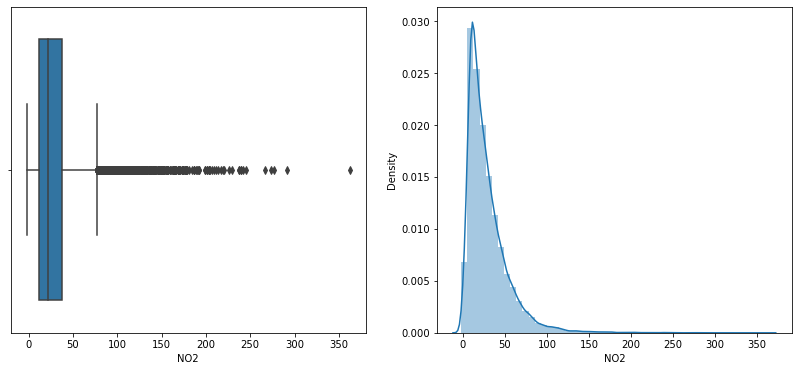

In [162]:
print(df1['NO2'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['NO2'])
plt.subplot(1,2,2)
sns.distplot(df1['NO2'])

In [163]:
q1=df1['NO2'].quantile(0.25)
q3=df1['NO2'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the NO2:',df1[(df1['NO2']>ul)|(df1['NO2']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the NO2: 4.447401314463127


#Observation:

#1. 4% of the data are Outliers

count    24801.000000
mean        31.550038
std         29.968115
min         -1.666883
25%         13.350000
50%         23.000000
75%         38.754588
max        378.240000
Name: NOx, dtype: float64


<AxesSubplot:xlabel='NOx', ylabel='Density'>

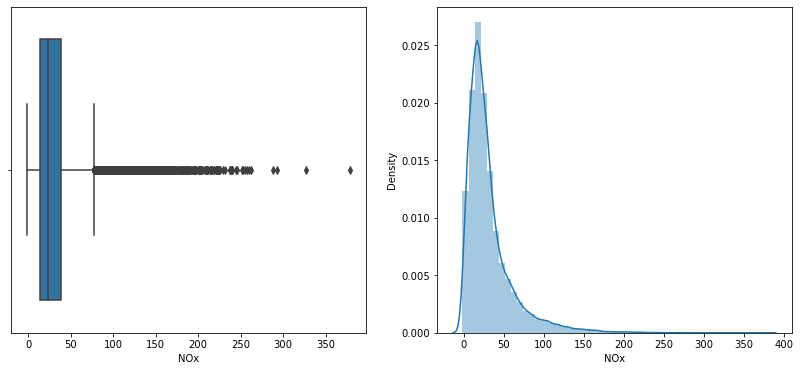

In [164]:
print(df1['NOx'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['NOx'])
plt.subplot(1,2,2)
sns.distplot(df1['NOx'])

In [165]:
q1=df1['NOx'].quantile(0.25)
q3=df1['NOx'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the NO2:',df1[(df1['NOx']>ul)|(df1['NOx']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the NO2: 7.4230877787186


#Observation

#1. Significant Outliers are observed in the dataset

#2. 7% of the data are outliers

In [166]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,index,City,AQI_Bucket,day
0,83.13,121.720342,6.93,28.71,33.72,20.925162,6.93,49.52,59.76,0.02,0.00,209.0,28,Ahmedabad,Poor,weekday
1,79.84,129.655658,13.85,28.68,41.08,28.699620,13.85,48.49,97.07,0.04,0.00,328.0,29,Ahmedabad,Very Poor,weekday
2,94.52,159.528786,24.39,32.66,52.61,35.619084,24.39,67.39,111.33,0.24,0.01,514.0,30,Ahmedabad,Severe,Weekend
3,135.99,180.209053,43.48,42.08,84.57,57.146057,43.48,75.23,102.70,0.40,0.04,782.0,31,Ahmedabad,Severe,Weekend
4,178.33,189.538483,54.56,35.31,72.80,81.066749,54.56,55.04,107.38,0.46,0.06,914.0,32,Ahmedabad,Severe,weekday


count    24801.000000
mean        25.198094
std         23.905145
min        -65.263504
25%         10.710000
50%         20.377524
75%         32.140000
max        352.890000
Name: NH3, dtype: float64


<AxesSubplot:xlabel='NH3', ylabel='Density'>

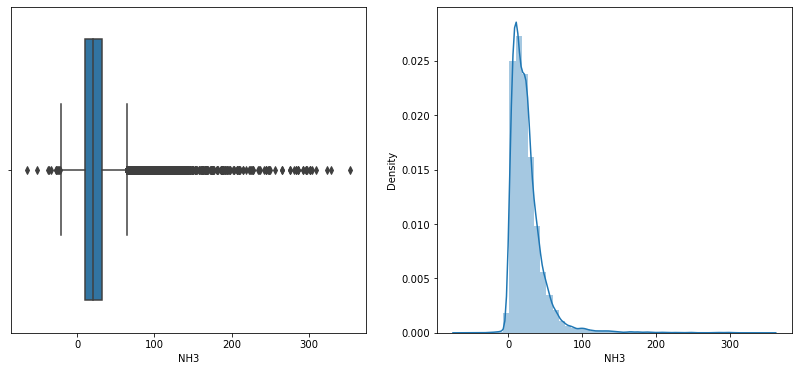

In [167]:
print(df1['NH3'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['NH3'])
plt.subplot(1,2,2)
sns.distplot(df1['NH3'])

In [168]:
q1=df1['NH3'].quantile(0.25)
q3=df1['NH3'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the NH3:',df1[(df1['NH3']>ul)|(df1['NH3']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the NH3: 4.536107415023588


#Observation:

#1. 4% of the data are outliers

#Carbon monoxide

count    24801.000000
mean         2.317946
std          7.032344
min        -12.756657
25%          0.580000
50%          0.930000
75%          1.480000
max        175.810000
Name: CO, dtype: float64


<AxesSubplot:xlabel='CO', ylabel='Density'>

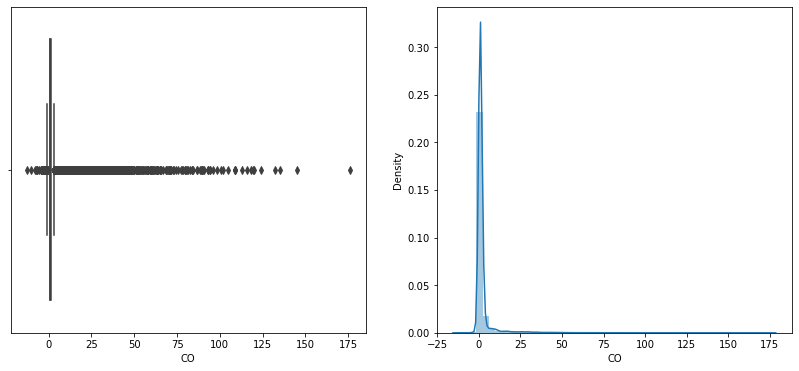

In [169]:
print(df1['CO'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['CO'])
plt.subplot(1,2,2)
sns.distplot(df1['CO'])

In [170]:
q1=df1['CO'].quantile(0.25)
q3=df1['CO'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the CO:',df1[(df1['CO']>ul)|(df1['CO']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the CO: 9.88266602153139


#Observation:

#1. 10% of the data are outliers


#SO2

count    24801.000000
mean        14.351834
std         17.303796
min          0.010000
25%          5.790000
50%          9.320000
75%         15.170000
max        186.080000
Name: SO2, dtype: float64


<AxesSubplot:xlabel='SO2', ylabel='Density'>

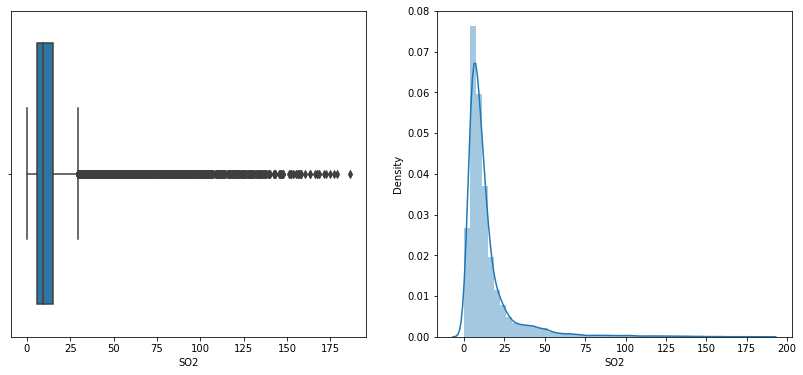

In [171]:
print(df1['SO2'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['SO2'])
plt.subplot(1,2,2)
sns.distplot(df1['SO2'])

In [172]:
q1=df1['SO2'].quantile(0.25)
q3=df1['SO2'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the SO2:',df1[(df1['SO2']>ul)|(df1['SO2']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the SO2: 9.741542679730655


#O3

count    24801.000000
mean        34.855996
std         21.455073
min        -38.029044
25%         19.580000
50%         31.240000
75%         45.640000
max        257.730000
Name: O3, dtype: float64


<AxesSubplot:xlabel='O3', ylabel='Density'>

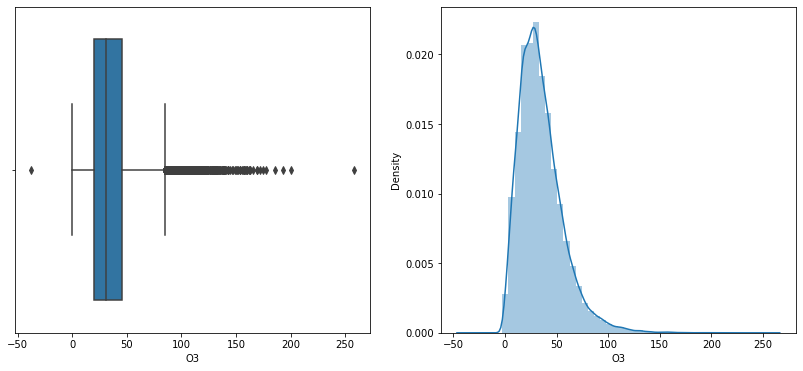

In [173]:
print(df1['O3'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['O3'])
plt.subplot(1,2,2)
sns.distplot(df1['O3'])

In [174]:
q1=df1['O3'].quantile(0.25)
q3=df1['O3'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the O3:',df1[(df1['O3']>ul)|(df1['O3']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the O3: 2.9514938913753475


#Benzene

count    24801.000000
mean         3.424154
std         14.934546
min         -7.489898
25%          0.320000
50%          1.690000
75%          3.520000
max        455.030000
Name: Benzene, dtype: float64


<AxesSubplot:xlabel='Benzene', ylabel='Density'>

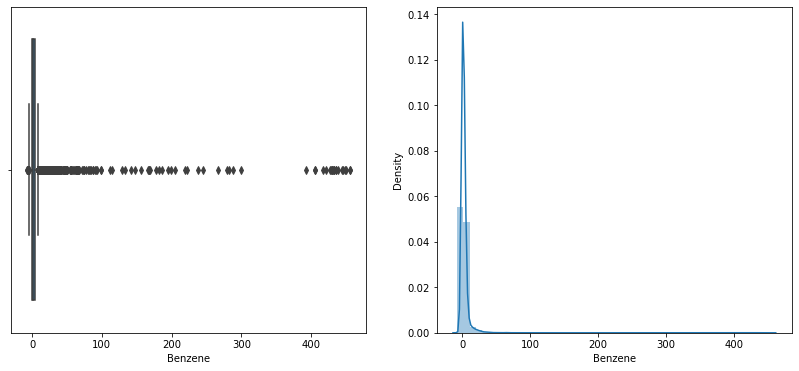

In [175]:
print(df1['Benzene'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['Benzene'])
plt.subplot(1,2,2)
sns.distplot(df1['Benzene'])

In [176]:
q1=df1['Benzene'].quantile(0.25)
q3=df1['Benzene'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the Benzene:',df1[(df1['Benzene']>ul)|(df1['Benzene']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the Benzene: 5.70944719970969


#Toluene:

count    24801.000000
mean         9.078966
std         19.065835
min        -15.680993
25%          1.390000
50%          4.440000
75%          9.910000
max        454.850000
Name: Toluene, dtype: float64


<AxesSubplot:xlabel='Toluene', ylabel='Density'>

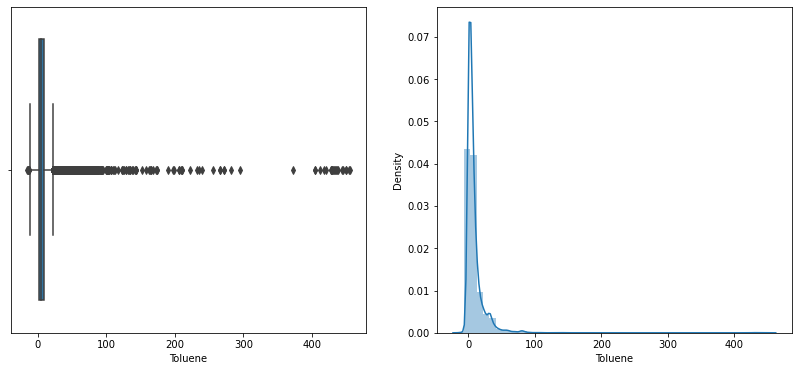

In [177]:
print(df1['Toluene'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['Toluene'])
plt.subplot(1,2,2)
sns.distplot(df1['Toluene'])

In [178]:
q1=df1['Toluene'].quantile(0.25)
q3=df1['Toluene'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
print('Percentage of Outliers in the Toluene:',df1[(df1['Toluene']>ul)|(df1['Toluene']<ll)].shape[0]/len(df1)*100)

Percentage of Outliers in the Toluene: 9.830248780291118


count    24801.000000
mean     14450.706101
std       8318.368275
min         28.000000
25%       7371.000000
50%      14058.000000
75%      20998.000000
max      29530.000000
Name: index, dtype: float64


<AxesSubplot:xlabel='index', ylabel='Density'>

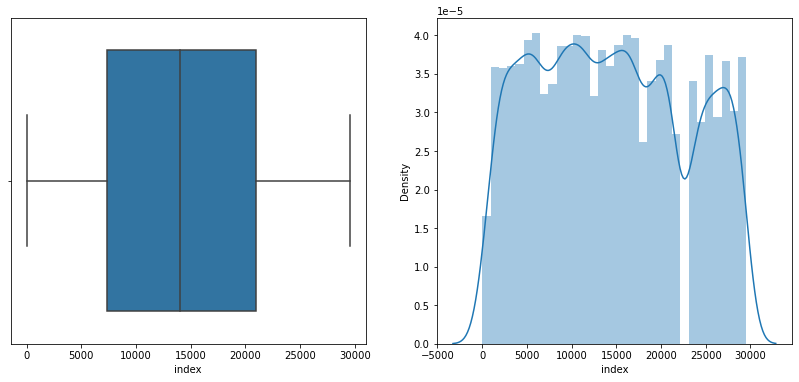

In [179]:
print(df1['index'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['index'])
plt.subplot(1,2,2)
sns.distplot(df1['index'])

                    city_count  city_percent
Delhi                     1999      8.060159
Bengaluru                 1909      7.697270
Lucknow                   1892      7.628725
Chennai                   1880      7.580340
Hyderabad                 1878      7.572275
Patna                     1458      5.878795
Gurugram                  1449      5.842506
Ahmedabad                 1332      5.370751
Visakhapatnam             1167      4.705455
Amritsar                  1119      4.511915
Jaipur                    1093      4.407080
Thiruvananthapuram        1049      4.229668
Amaravati                  840      3.386960
Mumbai                     773      3.116810
Jorapokhar                 766      3.088585
Kolkata                    754      3.040200
Brajrajnagar               710      2.862788
Talcher                    692      2.790210
Guwahati                   495      1.995887
Coimbatore                 343      1.383009
Chandigarh                 299      1.205597
Bhopal    

<AxesSubplot:>

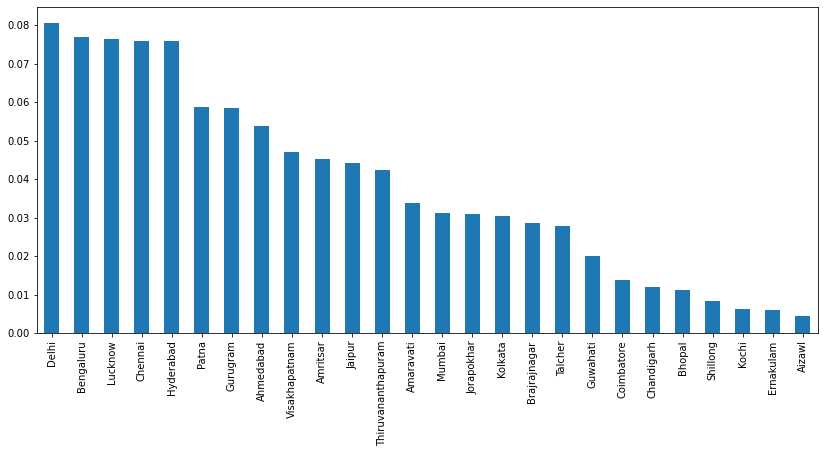

In [180]:
print(pd.DataFrame({'city_count':df1['City'].value_counts(),'city_percent':df1['City'].value_counts(normalize=True)*100}))
df1['City'].value_counts(normalize=True).plot(kind='bar')

#Observation:

#1. Most of the data observations are collected from Metropolitan cities like delhi,Bengaluru,Lucknow,chennai and hyderabad.

              city_count  city_percent
Moderate            8813     35.534857
Satisfactory        8202     33.071247
Poor                2778     11.201161
Very Poor           2336      9.418975
Severe              1337      5.390912
Good                1335      5.382847


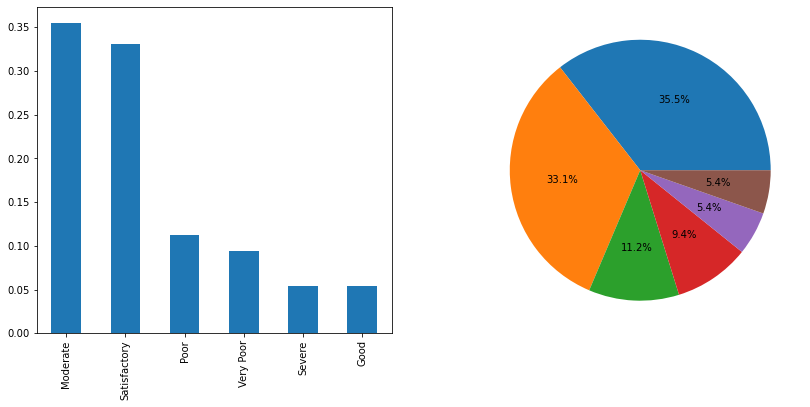

In [181]:
print(pd.DataFrame({'city_count':df1['AQI_Bucket'].value_counts(),'city_percent':df1['AQI_Bucket'].value_counts(normalize=True)*100}))
plt.subplot(1,2,1)
df1['AQI_Bucket'].value_counts(normalize=True).plot(kind='bar')
plt.subplot(1,2,2)
plt.pie(df1['AQI_Bucket'].value_counts(),autopct='%1.1f%%')
plt.show()

#Observation:

#1. Most of the observations (ie) 68% of the observation are Moderatly polluted and Satisfactory polluted.

#2. Remaining 32% of the observation are poor,Very poor,Severe and Good

         day_count  day_percent
weekday      17704    71.384218
Weekend       7097    28.615782


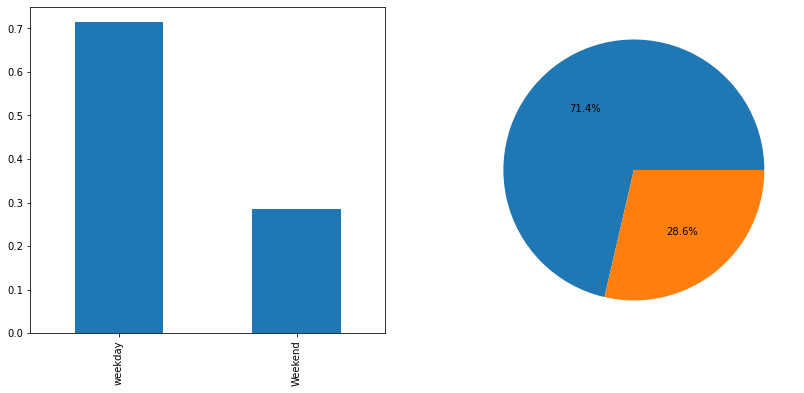

In [182]:
print(pd.DataFrame({'day_count':df1['day'].value_counts(),'day_percent':df1['day'].value_counts(normalize=True)*100}))
plt.subplot(1,2,1)
df1['day'].value_counts(normalize=True).plot(kind='bar')
plt.subplot(1,2,2)
plt.pie(df1['day'].value_counts(),autopct='%1.1f%%')
plt.show()

#Observation:

#1. Nearly 70% of the data are observed in the weekdays and 30% are observed in the weekends

In [183]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,index,City,AQI_Bucket,day
0,83.13,121.720342,6.93,28.71,33.72,20.925162,6.93,49.52,59.76,0.02,0.00,209.0,28,Ahmedabad,Poor,weekday
1,79.84,129.655658,13.85,28.68,41.08,28.699620,13.85,48.49,97.07,0.04,0.00,328.0,29,Ahmedabad,Very Poor,weekday
2,94.52,159.528786,24.39,32.66,52.61,35.619084,24.39,67.39,111.33,0.24,0.01,514.0,30,Ahmedabad,Severe,Weekend
3,135.99,180.209053,43.48,42.08,84.57,57.146057,43.48,75.23,102.70,0.40,0.04,782.0,31,Ahmedabad,Severe,Weekend
4,178.33,189.538483,54.56,35.31,72.80,81.066749,54.56,55.04,107.38,0.46,0.06,914.0,32,Ahmedabad,Severe,weekday


# Bivariate Analysis:

#PM.2.5 vs AQI-Bucket

<AxesSubplot:xlabel='AQI_Bucket'>

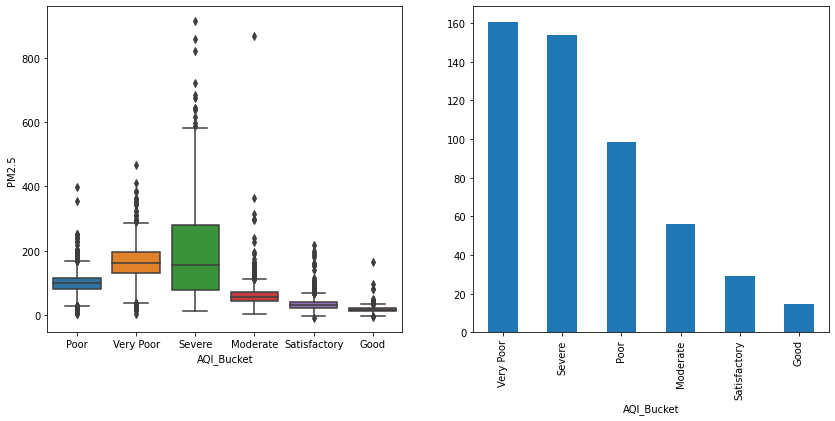

In [184]:
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['PM2.5'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['PM2.5'].median().sort_values(ascending=False).plot(kind='bar')

#Observation:

#1. Linear relationship exist between PM2.5 and target variable.

#2. when the level of PM2.5 is lesser the pollution category is good.

#PM10 vs AQI-Bucket

<AxesSubplot:xlabel='AQI_Bucket'>

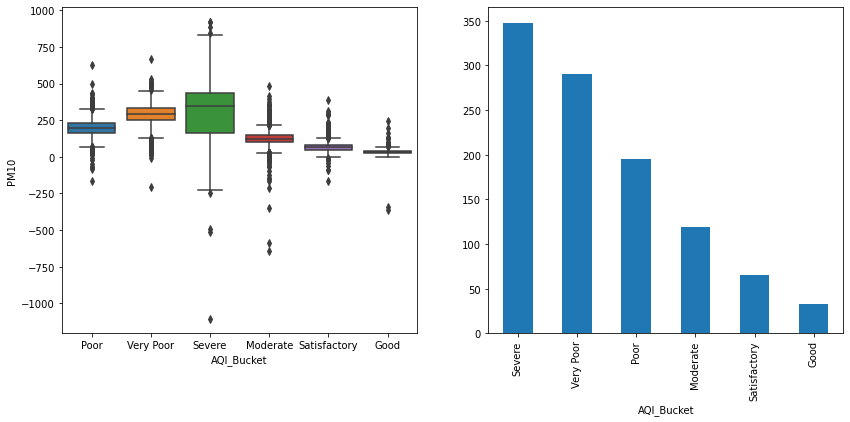

In [185]:
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['PM10'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['PM10'].median().sort_values(ascending=False).plot(kind='bar')

In [186]:
#NO vs AQI-Bucket

<AxesSubplot:xlabel='AQI_Bucket'>

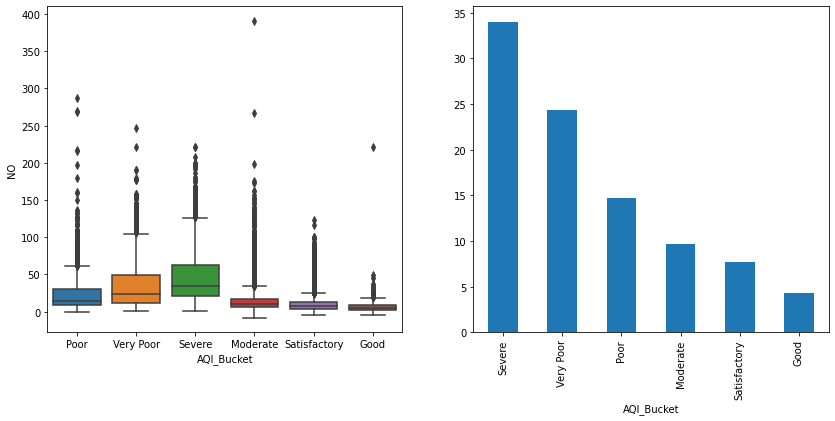

In [187]:
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['NO'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['NO'].median().sort_values(ascending=False).plot(kind='bar')

#NO2 vs AQI-Bucket

<AxesSubplot:xlabel='AQI_Bucket'>

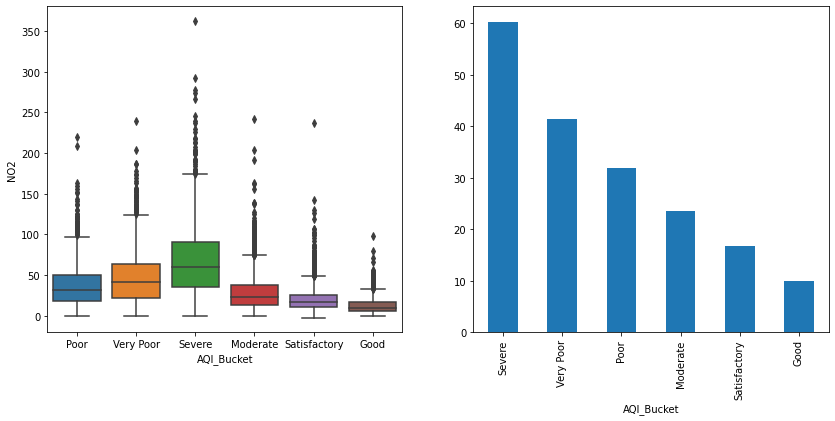

In [188]:
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['NO2'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['NO2'].median().sort_values(ascending=False).plot(kind='bar')

In [189]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,index,City,AQI_Bucket,day
0,83.13,121.720342,6.93,28.71,33.72,20.925162,6.93,49.52,59.76,0.02,0.00,209.0,28,Ahmedabad,Poor,weekday
1,79.84,129.655658,13.85,28.68,41.08,28.699620,13.85,48.49,97.07,0.04,0.00,328.0,29,Ahmedabad,Very Poor,weekday
2,94.52,159.528786,24.39,32.66,52.61,35.619084,24.39,67.39,111.33,0.24,0.01,514.0,30,Ahmedabad,Severe,Weekend
3,135.99,180.209053,43.48,42.08,84.57,57.146057,43.48,75.23,102.70,0.40,0.04,782.0,31,Ahmedabad,Severe,Weekend
4,178.33,189.538483,54.56,35.31,72.80,81.066749,54.56,55.04,107.38,0.46,0.06,914.0,32,Ahmedabad,Severe,weekday


#NOx vs AQI-Bucket

<AxesSubplot:xlabel='AQI_Bucket'>

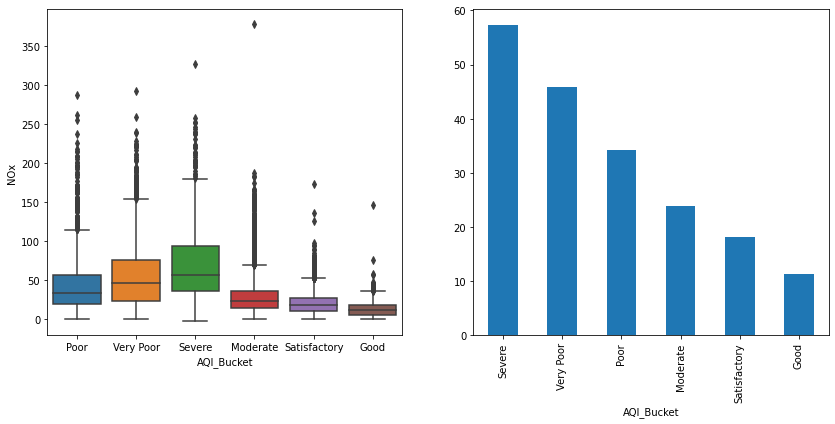

In [190]:
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['NOx'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['NOx'].median().sort_values(ascending=False).plot(kind='bar')

#NH3 vs AQI-Bucket

<AxesSubplot:xlabel='AQI_Bucket'>

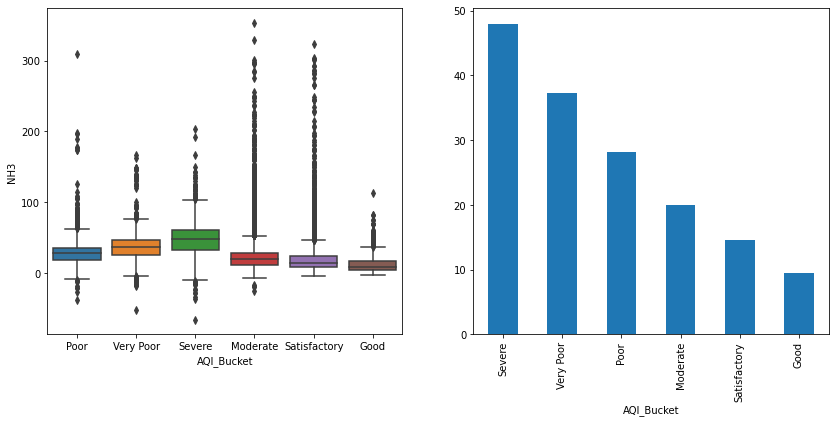

In [191]:
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['NH3'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['NH3'].median().sort_values(ascending=False).plot(kind='bar')

#CO vs AQI-Bucket

Text(-0.8, 1.7, '1.7')

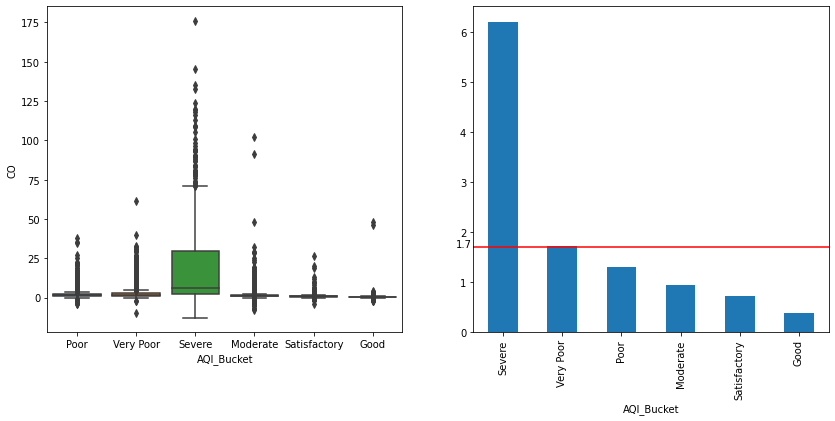

In [192]:
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['CO'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['CO'].median().sort_values(ascending=False).plot(kind='bar')
plt.axhline(1.7,color='red')
plt.text(-0.8,1.7,1.7)

In [193]:
#Obervation:

#1. level of carbon monoxide is significantly higher for severe category

#2. Outliers are higher may influence the model.

#SO2 vs AQI-Bucket

<AxesSubplot:xlabel='AQI_Bucket'>

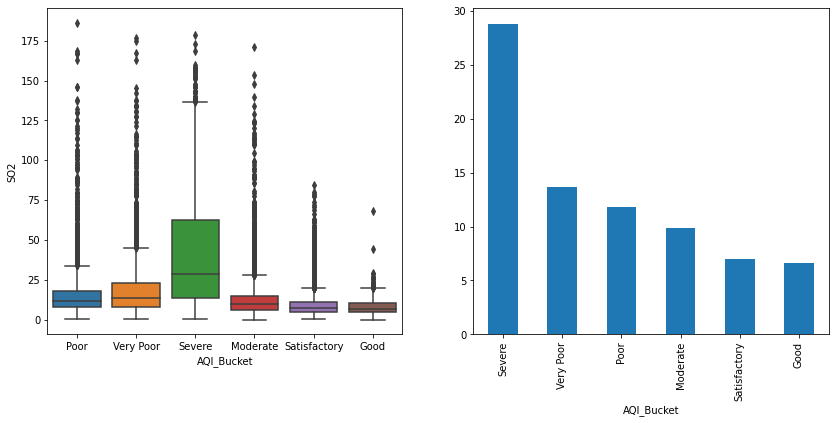

In [194]:
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['SO2'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['SO2'].median().sort_values(ascending=False).plot(kind='bar')

#Benzene vs AQI-Bucket


<AxesSubplot:xlabel='AQI_Bucket'>

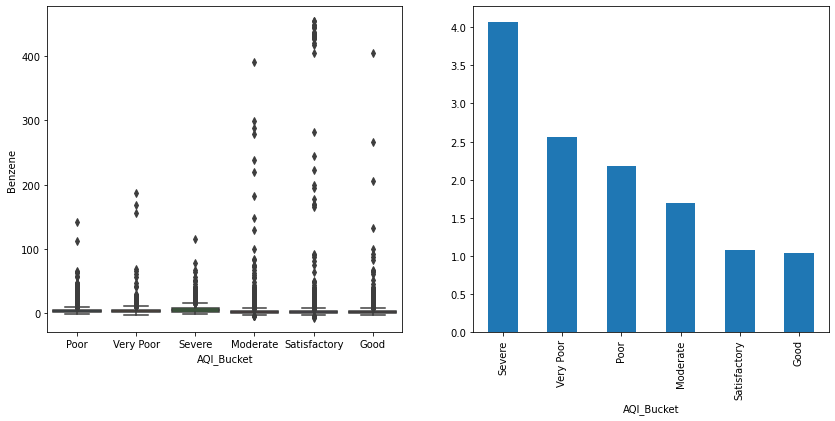

In [195]:
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['Benzene'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['Benzene'].median().sort_values(ascending=False).plot(kind='bar')

In [196]:
#Observation:

#1. Linear relationship exist between the Benzene and target variable

#2. Presence of outliers may influence the results.

#Toluene vs AQI-Bucket

Text(-0.8, 7.6, '7.6')

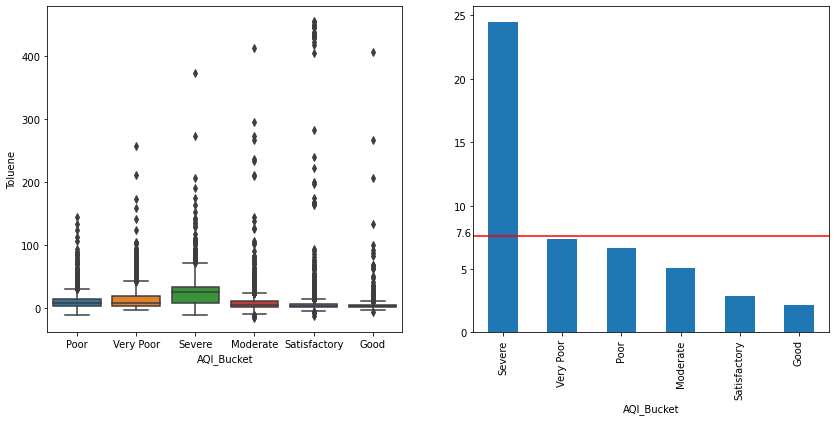

In [197]:
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['AQI_Bucket'],df1['Toluene'])
plt.subplot(1,2,2)
df1.groupby('AQI_Bucket')['Toluene'].median().sort_values(ascending=False).plot(kind='bar')
plt.axhline(7.6,color='red')
plt.text(-0.8,7.6,7.6)

#Observation:

#1. The Toluene pollutant value for severe is significantly higher.

#2. Toluene pollutant shows a linear relationship with the target variable

#3. As the toluene level increases the pollution level increases.

#Day vs AQI-Bucket

<AxesSubplot:xlabel='day'>

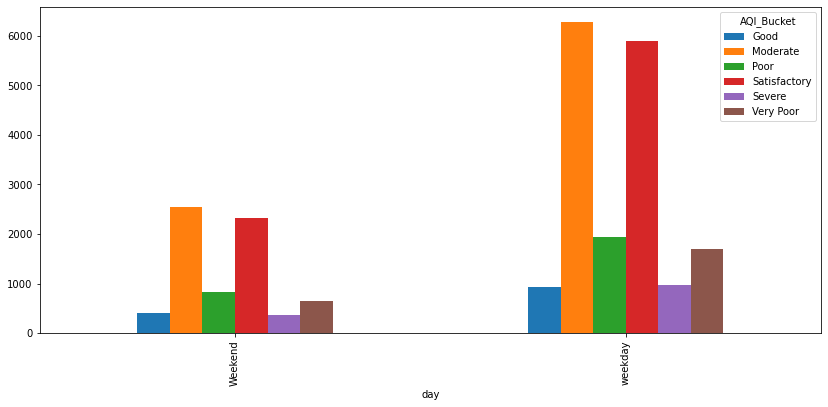

In [198]:
pd.crosstab(df1['day'],df1['AQI_Bucket']).plot(kind='bar')

#Observations

#1. In the weekends the moderate and satisfactory are levels are in higher numbers

#2. In the weekends the severe class is relatively lesser when compared to other classes

#3. This may vary depending on the cities.

#4. During weekdays the moderate and satisfactory are higher

<AxesSubplot:xlabel='City'>

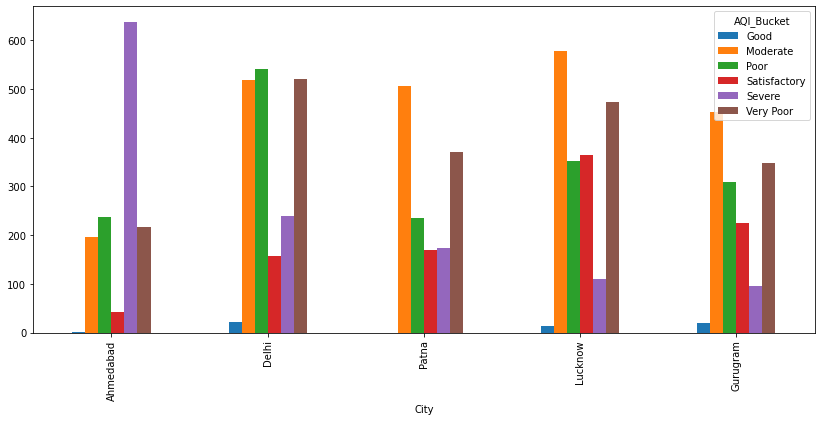

In [199]:
pd.crosstab(df1['City'],df1['AQI_Bucket']).sort_values('Severe',ascending=False).head().plot(kind='bar')

In [200]:
d=pd.crosstab(df1['City'],df1['AQI_Bucket']).sort_values(['Severe','Very Poor','Poor','Moderate','Good'],ascending=False)
d.style.highlight_max()

AQI_Bucket,Good,Moderate,Poor,Satisfactory,Severe,Very Poor
City,,,,,,
Ahmedabad,1,197,237,43,638,216
Delhi,21,519,542,158,239,520
Patna,0,507,236,170,174,371
Lucknow,14,578,352,365,110,473
Gurugram,19,453,310,224,95,348
Talcher,19,321,83,148,24,97
Jorapokhar,10,450,121,134,17,34
Kolkata,119,152,119,285,13,66
Amritsar,84,445,66,470,7,47


#Observations:

#1. Ahmedabad,Delhi,patna,Lucknow and Gurugram has recorded high pollution compared to the other areas.

#2. Amaravati has recorded more Good level of pollution.

#3. Delhi recorded frequent poor ,very poor level of pollution.

#4. Bengaluru recorded frequent satisfactory level of pollution and it has 0 severe condition.

In [201]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,index,City,AQI_Bucket,day
0,83.13,121.720342,6.93,28.71,33.72,20.925162,6.93,49.52,59.76,0.02,0.00,209.0,28,Ahmedabad,Poor,weekday
1,79.84,129.655658,13.85,28.68,41.08,28.699620,13.85,48.49,97.07,0.04,0.00,328.0,29,Ahmedabad,Very Poor,weekday
2,94.52,159.528786,24.39,32.66,52.61,35.619084,24.39,67.39,111.33,0.24,0.01,514.0,30,Ahmedabad,Severe,Weekend
3,135.99,180.209053,43.48,42.08,84.57,57.146057,43.48,75.23,102.70,0.40,0.04,782.0,31,Ahmedabad,Severe,Weekend
4,178.33,189.538483,54.56,35.31,72.80,81.066749,54.56,55.04,107.38,0.46,0.06,914.0,32,Ahmedabad,Severe,weekday


<AxesSubplot:xlabel='AQI'>

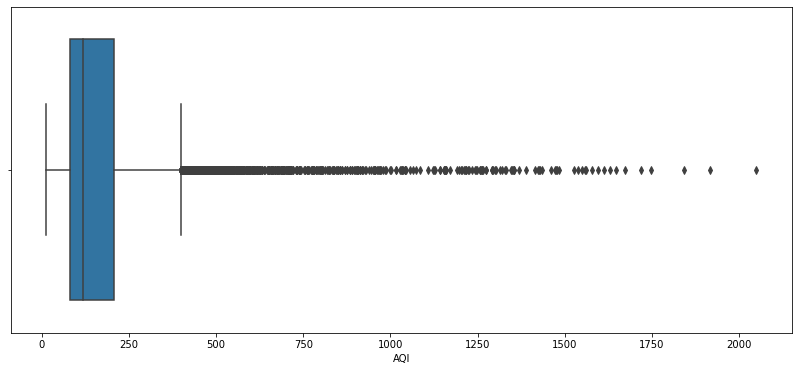

In [202]:
sns.boxplot(df1['AQI'])

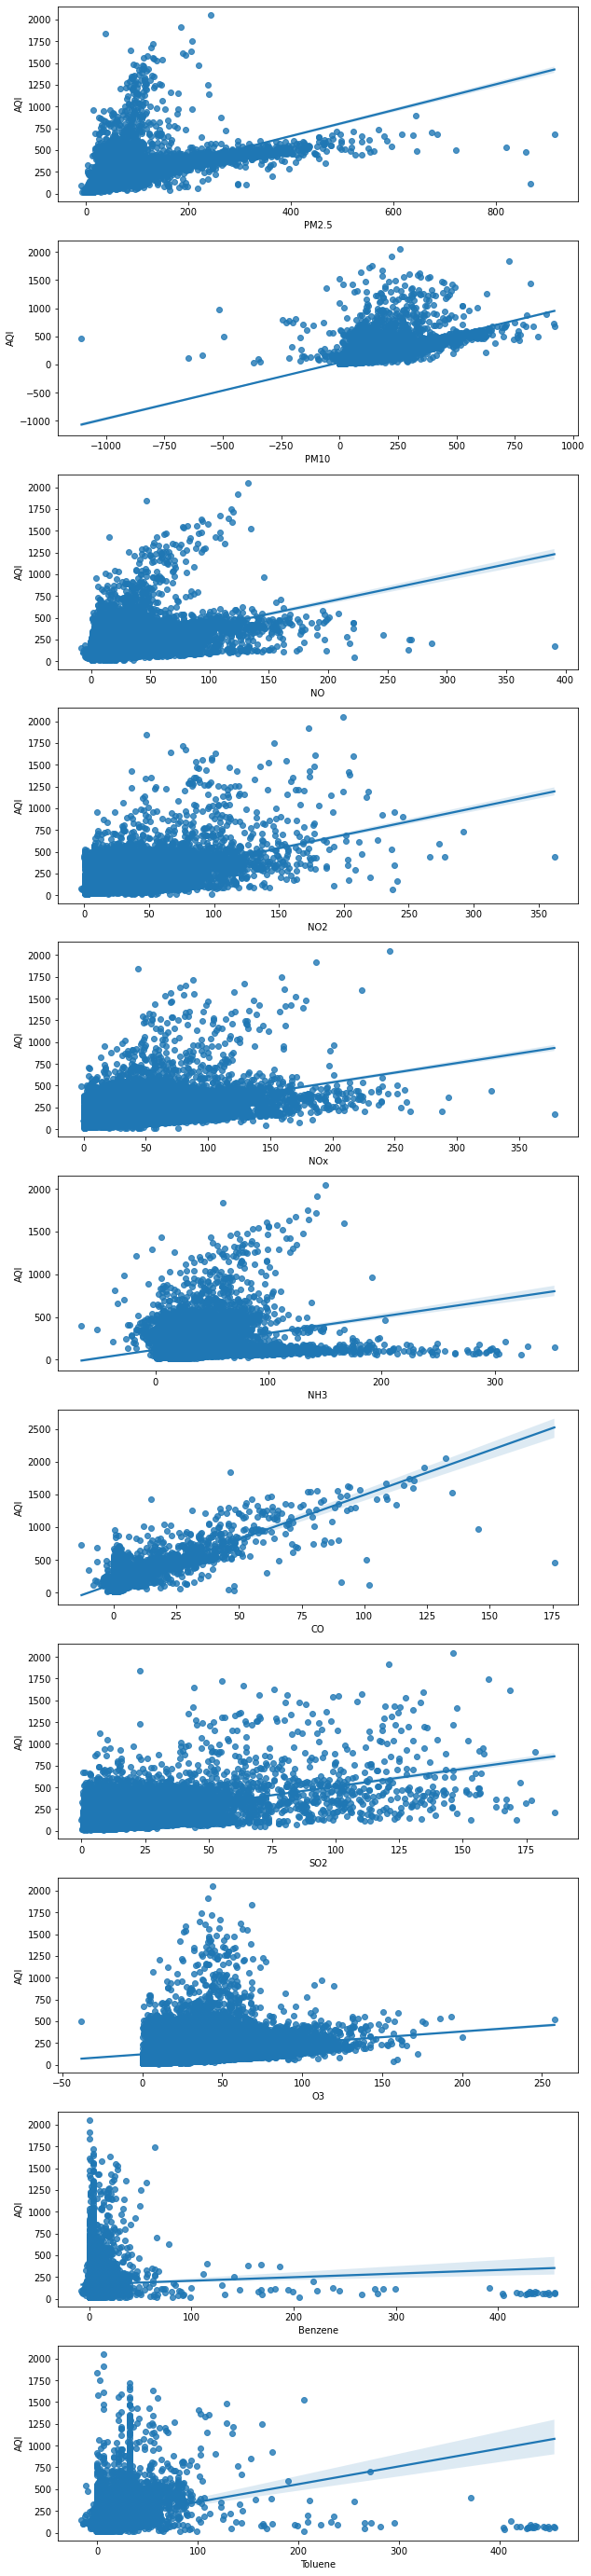

In [203]:
lists=list(df_num.columns[:-1])
%matplotlib inline
plt.rcParams['figure.figsize']=(10,50)
count=1
for i in lists:
    
    plt.subplot(len(lists),1,count)
    sns.regplot(df1[i],df1['AQI'])
    df1['AQI'].corr(df1[i])
    count+=1

<AxesSubplot:xlabel='PM2.5', ylabel='AQI'>

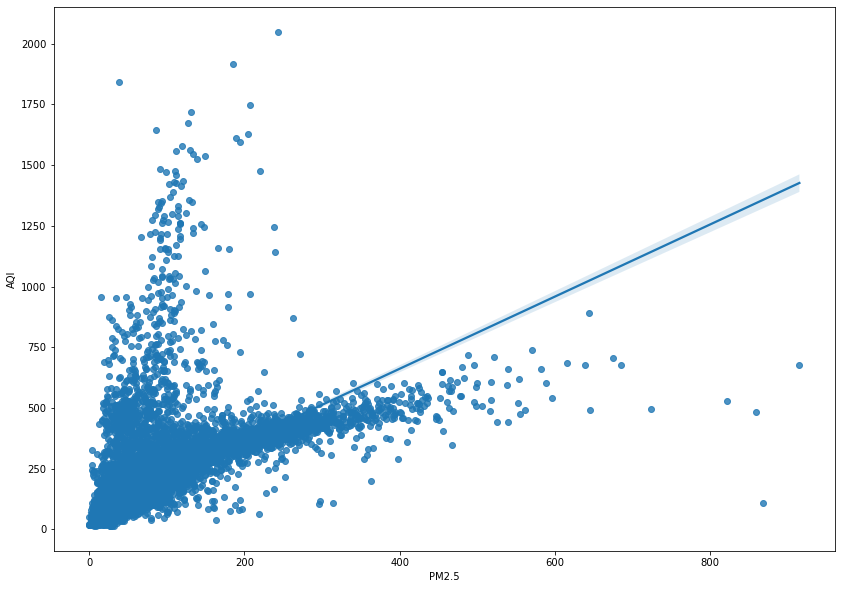

In [282]:
sns.regplot(df1['PM2.5'],df1['AQI'])

In [204]:
for i in lists:
    print(i,':',df1['AQI'].corr(df1[i]))

PM2.5 : 0.6629897819187613
PM10 : 0.7069747257090039
NO : 0.45237943903656536
NO2 : 0.5365105750564657
NOx : 0.47064651137979846
NH3 : 0.3294023611935005
CO : 0.6792117459118747
SO2 : 0.49440363683976085
O3 : 0.19987779702279904
Benzene : 0.04377588346754271
Toluene : 0.2768379769805218


In [205]:
q1=df1['PM2.5'].quantile(0.25)
q3=df1['PM2.5'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
df_o=df1[~(df1['PM2.5']>ul)|(df1['PM2.5']<ll)]

In [206]:
df_temp.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI_Bucket,AQI,day
28,Ahmedabad,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,Poor,209.0,weekday
29,Ahmedabad,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,Very Poor,328.0,weekday
30,Ahmedabad,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,Severe,514.0,Weekend
31,Ahmedabad,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,Severe,782.0,Weekend
32,Ahmedabad,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,Severe,914.0,weekday


In [207]:
df_temp.isnull().sum()

City             0
PM2.5          629
PM10          7037
NO             338
NO2            342
NOx           1808
NH3           6487
CO             396
SO2            556
O3             758
Benzene       3486
Toluene       5777
AQI_Bucket       0
AQI              0
day              0
dtype: int64

In [208]:
df_t=df_temp.dropna(subset=['PM2.5'],axis=0)

In [209]:
df_t.isnull().sum()

City             0
PM2.5            0
PM10          7026
NO             305
NO2            323
NOx           1375
NH3           6360
CO             341
SO2            475
O3             694
Benzene       3016
Toluene       5290
AQI_Bucket       0
AQI              0
day              0
dtype: int64

In [283]:
df_t['PM2.5'].corr(df_t['AQI'])

0.6591810111093794

In [211]:
df_temp['PM2.5'].corr(df_temp['PM10'])

0.8531997687604478

<AxesSubplot:xlabel='PM2.5', ylabel='PM10'>

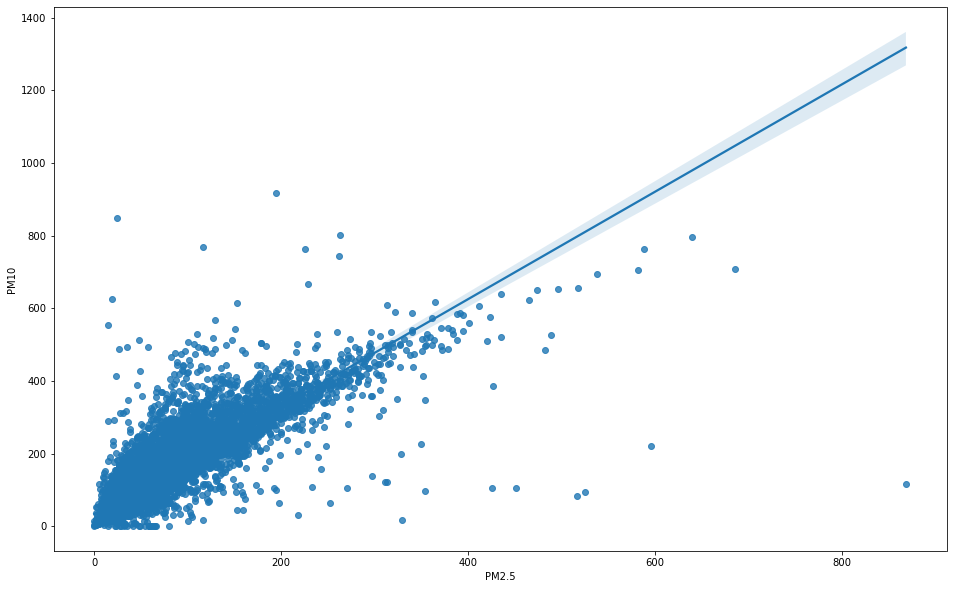

In [212]:
plt.rcParams['figure.figsize']=(16,10)
sns.regplot(df_t['PM2.5'],df_t['PM10'])

In [213]:
df_t.groupby('City')[['PM2.5','PM10']].median()

,PM2.5,PM10
City,,
Ahmedabad,58.405,107.670
Aizawl,10.450,19.020
Amaravati,28.215,64.630
Amritsar,43.960,100.220
Bengaluru,30.970,77.970
Bhopal,45.015,120.920
Brajrajnagar,60.795,120.360
Chandigarh,33.660,78.660
Chennai,45.505,50.245


In [214]:
df1=pd.read_csv('work_file.csv')
df1.head()

,Unnamed: 0,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,City,Weekend,AQI,AQI_Bucket
0,0,83.13,161.026835,6.93,28.71,33.72,28.021392,6.93,49.52,59.76,0.02,0.00,Ahmedabad,0,209.0,Poor
1,1,79.84,162.837215,13.85,28.68,41.08,23.117152,13.85,48.49,97.07,0.04,0.00,Ahmedabad,0,328.0,Very Poor
2,2,94.52,192.984557,24.39,32.66,52.61,27.271646,24.39,67.39,111.33,0.24,0.01,Ahmedabad,1,514.0,Severe
3,3,135.99,259.694747,43.48,42.08,84.57,35.869114,43.48,75.23,102.70,0.40,0.04,Ahmedabad,1,782.0,Severe
4,4,178.33,298.786392,54.56,35.31,72.80,44.273228,54.56,55.04,107.38,0.46,0.06,Ahmedabad,0,914.0,Severe


In [215]:
df1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [216]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,City,Weekend,AQI,AQI_Bucket
0,83.13,161.026835,6.93,28.71,33.72,28.021392,6.93,49.52,59.76,0.02,0.00,Ahmedabad,0,209.0,Poor
1,79.84,162.837215,13.85,28.68,41.08,23.117152,13.85,48.49,97.07,0.04,0.00,Ahmedabad,0,328.0,Very Poor
2,94.52,192.984557,24.39,32.66,52.61,27.271646,24.39,67.39,111.33,0.24,0.01,Ahmedabad,1,514.0,Severe
3,135.99,259.694747,43.48,42.08,84.57,35.869114,43.48,75.23,102.70,0.40,0.04,Ahmedabad,1,782.0,Severe
4,178.33,298.786392,54.56,35.31,72.80,44.273228,54.56,55.04,107.38,0.46,0.06,Ahmedabad,0,914.0,Severe


<AxesSubplot:>

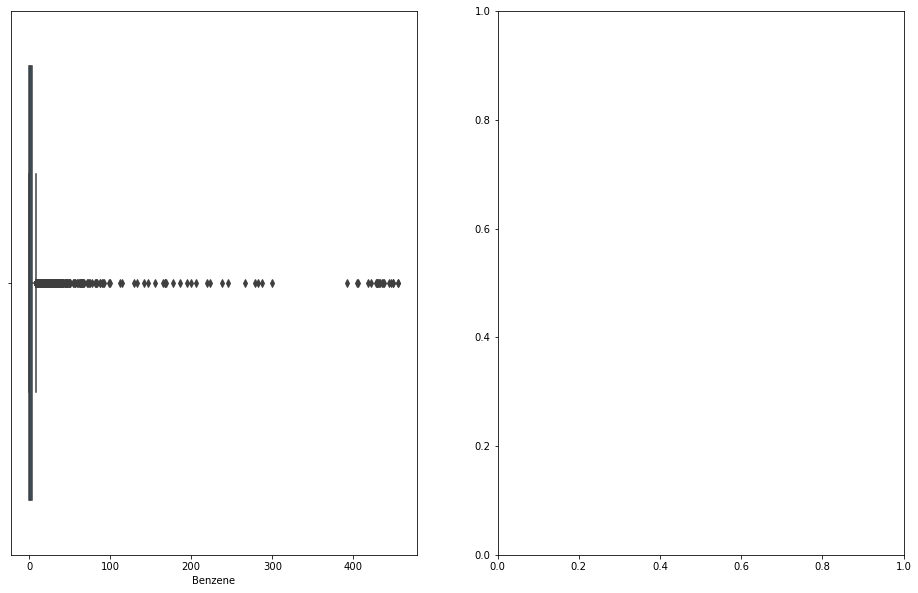

In [217]:
plt.subplot(1,2,1)
sns.boxplot(df1['Benzene'])
plt.subplot(1,2,2)


count    24850.000000
mean         3.458644
std         14.946707
min          0.000000
25%          0.340000
50%          1.534620
75%          3.360000
max        455.030000
Name: Benzene, dtype: float64


<AxesSubplot:xlabel='Benzene', ylabel='Density'>

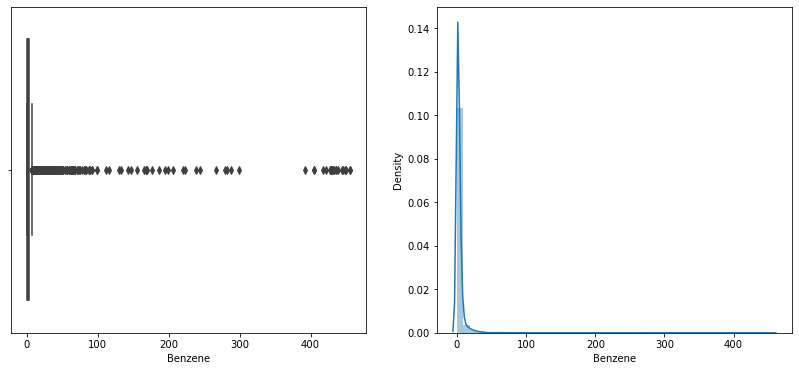

In [218]:
print(df1['Benzene'].describe())
plt.rcParams['figure.figsize']=(14,6)
plt.subplot(1,2,1)
sns.boxplot(df1['Benzene'])
plt.subplot(1,2,2)
sns.distplot(df1['Benzene'])

In [219]:
# Relation between PM2.5 and PM10:

0.6930382123400874


<AxesSubplot:xlabel='PM2.5', ylabel='PM10'>

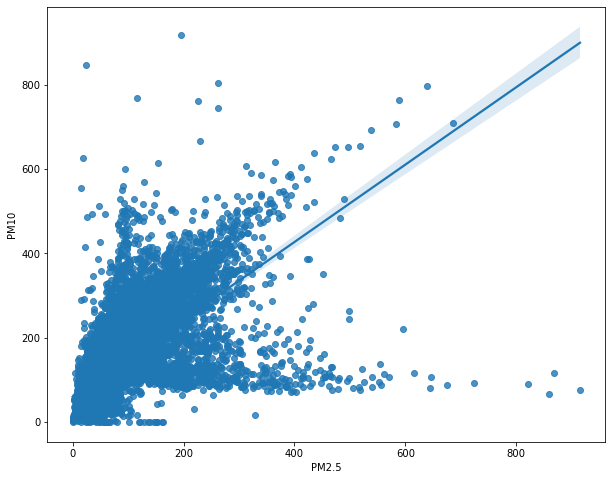

In [220]:
plt.rcParams['figure.figsize']=(10,8)
print(df1['PM2.5'].corr(df1['PM10']))
sns.regplot(df1['PM2.5'],df1['PM10'])

In [221]:
col=['PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene']

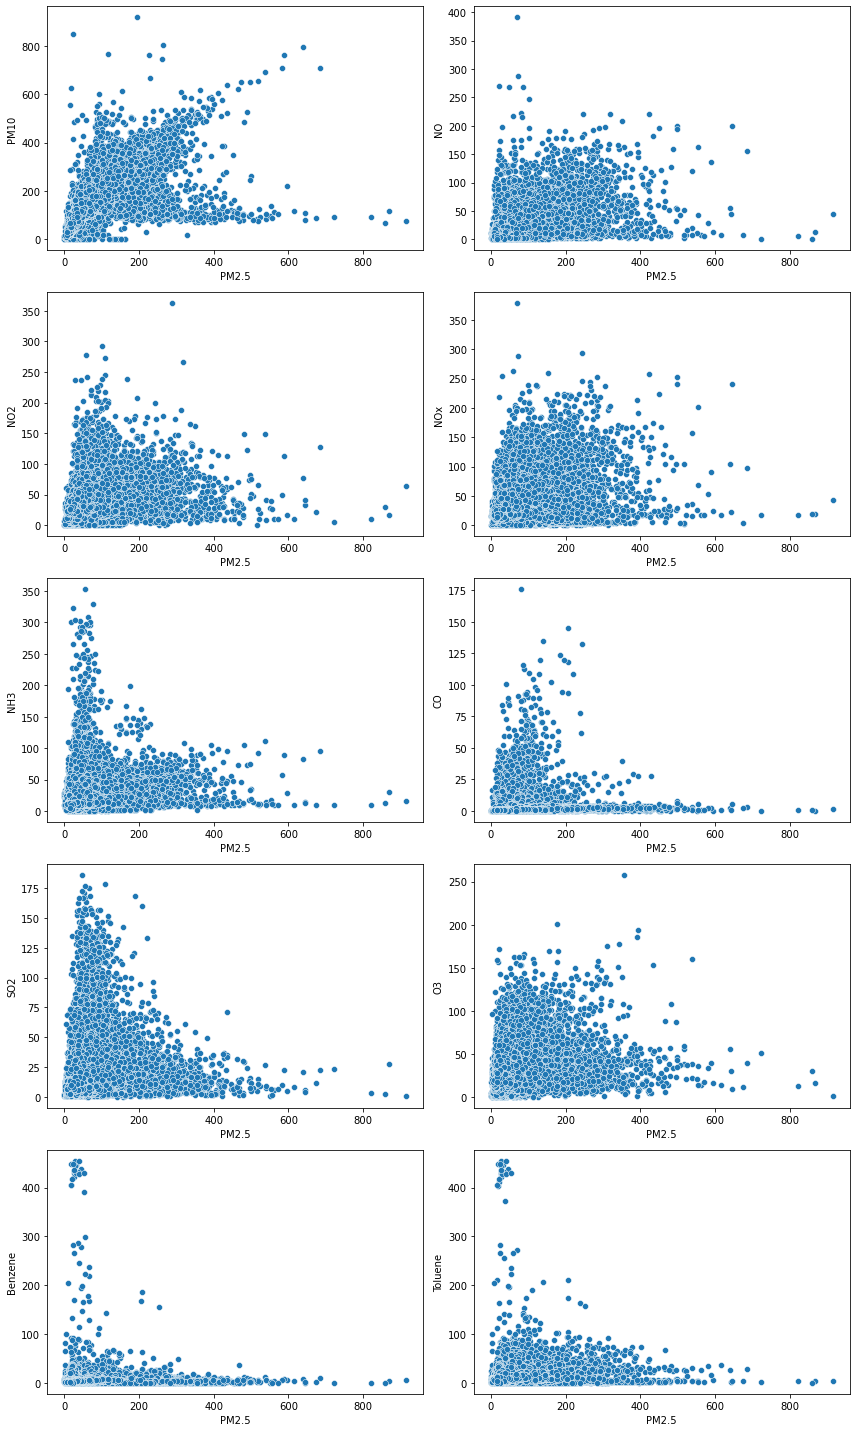

In [222]:
fig,ax=plt.subplots(5,2,figsize=(12,20))
for v,subplot in zip(df1[col].columns,ax.flatten()):
    z=sns.scatterplot(df1['PM2.5'],df1[v],ax=subplot)
    z.set_label(df[col].columns)
plt.tight_layout()
plt.show()

In [223]:
df1[col].columns

Index(['PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene'],
      dtype='object')

Observation:

#PM2.5 have no variation when compared it with the day's Feature

#This implies that the emision of PM2.5 is nearly same in weekdays and weekends

City
Delhi                 94.89000
Patna                 92.47000
Gurugram              90.59000
Lucknow               86.56000
Jorapokhar            75.94981
Brajrajnagar          61.88000
Ahmedabad             58.46500
Jaipur                49.86500
Talcher               48.98500
Guwahati              46.15000
Amritsar              46.13000
Chennai               45.56500
Bhopal                45.01500
Kolkata               43.65000
Hyderabad             42.10500
Visakhapatnam         41.43000
Chandigarh            35.14000
Bengaluru             31.74000
Coimbatore            29.00000
Amaravati             28.39000
Kochi                 24.28500
Mumbai                23.72000
Thiruvananthapuram    22.57000
Shillong              19.67000
Ernakulam             19.38000
Aizawl                10.48000
Name: PM2.5, dtype: float64


<AxesSubplot:xlabel='City'>

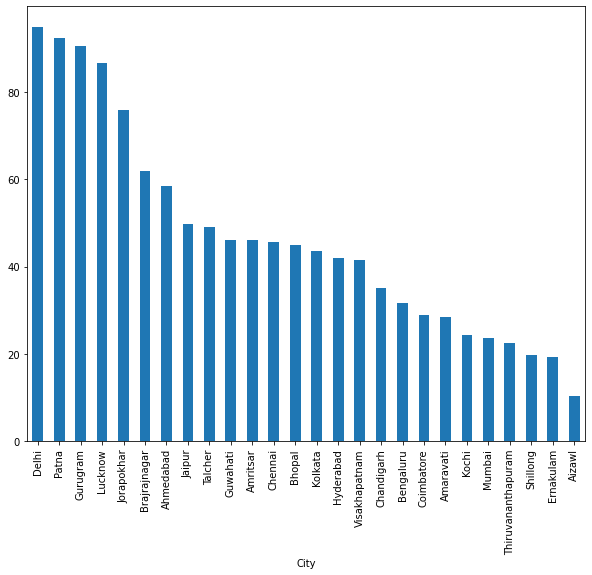

In [225]:
print(df1.groupby('City')['PM2.5'].median().sort_values(ascending=False))
df1.groupby('City')['PM2.5'].median().sort_values(ascending=False).plot(kind='bar')

#Observation:

#Emision of PM2.5 for delhi is higher when compared to the other Cities


<AxesSubplot:>

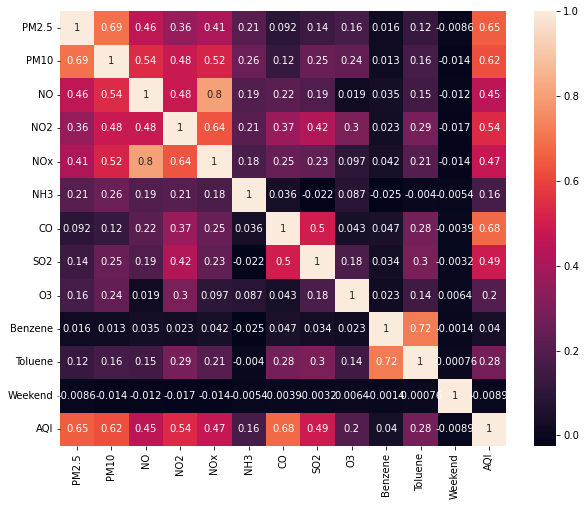

In [226]:
#Multivariate Analysis:
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:xlabel='PM2.5', ylabel='PM10'>

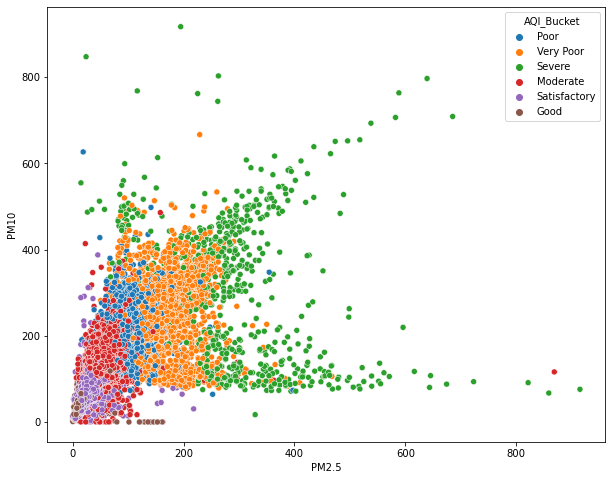

In [227]:
sns.scatterplot(df1['PM2.5'],df1['PM10'],hue=df1['AQI_Bucket'])

#Observations

#Level of Pollution is significantly increases as the pollutant PM2.5 and PM10 increases 

#This plot clearly shows that the Outliers present in the data are severe pollution conditions.

#There is clear seperation between the class indicates the Linear relation between them.

#Observations:

#As we see in the univariate and bivariate analysis there is significant relation between the day and pollutants

In [229]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,City,Weekend,AQI,AQI_Bucket
0,83.13,161.026835,6.93,28.71,33.72,28.021392,6.93,49.52,59.76,0.02,0.00,Ahmedabad,0,209.0,Poor
1,79.84,162.837215,13.85,28.68,41.08,23.117152,13.85,48.49,97.07,0.04,0.00,Ahmedabad,0,328.0,Very Poor
2,94.52,192.984557,24.39,32.66,52.61,27.271646,24.39,67.39,111.33,0.24,0.01,Ahmedabad,1,514.0,Severe
3,135.99,259.694747,43.48,42.08,84.57,35.869114,43.48,75.23,102.70,0.40,0.04,Ahmedabad,1,782.0,Severe
4,178.33,298.786392,54.56,35.31,72.80,44.273228,54.56,55.04,107.38,0.46,0.06,Ahmedabad,0,914.0,Severe


<AxesSubplot:xlabel='PM2.5', ylabel='AQI'>

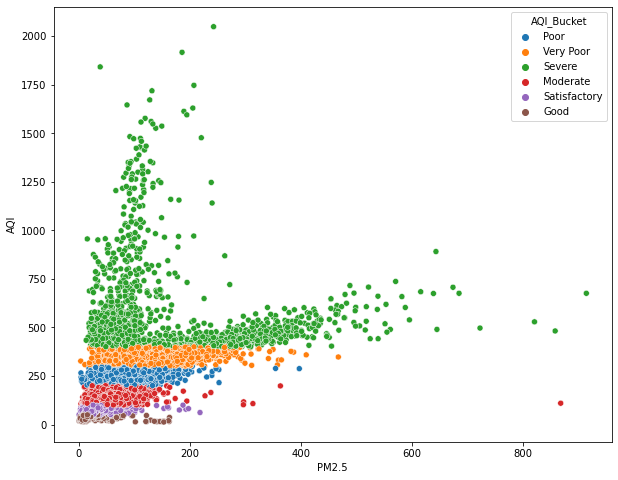

In [230]:
sns.scatterplot(df1['PM2.5'],df1['AQI'],hue=df1['AQI_Bucket'])

<AxesSubplot:xlabel='PM10', ylabel='AQI'>

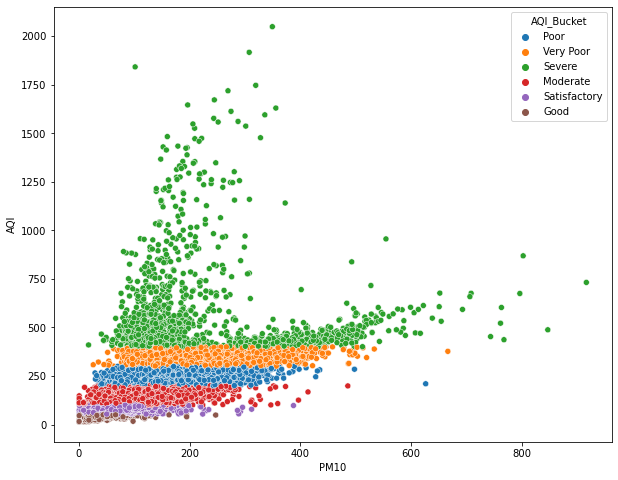

In [231]:
sns.scatterplot(df1['PM10'],df1['AQI'],hue=df1['AQI_Bucket'])

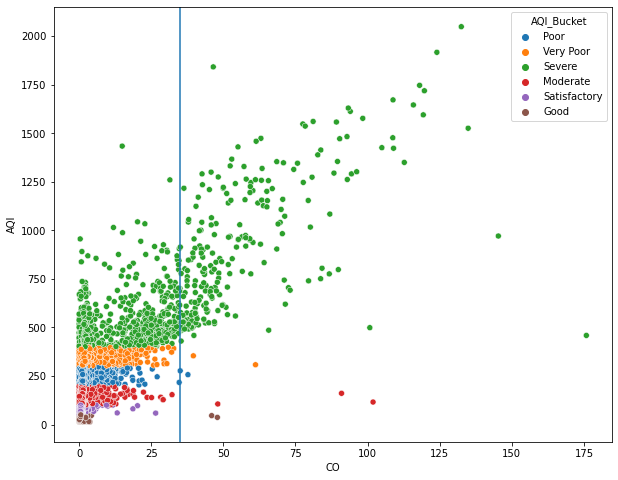

In [232]:
sns.scatterplot(df1['CO'],df1['AQI'],hue=df1['AQI_Bucket'])
plt.axvline(35)

#Observations:

#When carbon monoxide is greater than 35 the pollution level becomes severe.

#Clear pattern can be seen when CO increases the AQI index increases 


In [233]:
a=pd.DataFrame([1,2,3],[23,np.nan,26]).reset_index()

In [234]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [235]:
kn=KNNImputer()
x_scale=StandardScaler()
x_s=x_scale.fit_transform(a)
b=kn.fit_transform(x_s)

In [236]:
x_scale.inverse_transform(b)

array([[23. ,  1. ],
       [24.5,  2. ],
       [26. ,  3. ]])

In [237]:
df_temp.isnull().sum()/len(df_temp)

City          0.000000
PM2.5         0.025362
PM10          0.283739
NO            0.013628
NO2           0.013790
NOx           0.072900
NH3           0.261562
CO            0.015967
SO2           0.022418
O3            0.030563
Benzene       0.140559
Toluene       0.232934
AQI_Bucket    0.000000
AQI           0.000000
day           0.000000
dtype: float64

In [238]:
df_num

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
28,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,209.0
29,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,328.0
30,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,514.0
31,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,782.0
32,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,914.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,68.0
29529,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,54.0


In [239]:
x_scale=StandardScaler()
x_s=x_scale.fit_transform(df_num)
kn=KNNImputer()
x_imputed=kn.fit_transform(x_s)

In [240]:
df_imputed=pd.DataFrame(x_imputed,columns=df_num.columns)
df_imputed.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
0,0.248175,0.814831,-0.476900,-0.010898,0.046593,-0.676258,0.648013,2.017236,1.143759,-0.214439,-0.456201,0.301375
1,0.196014,0.900678,-0.168256,-0.012117,0.286238,-0.424667,1.626096,1.958137,2.861209,-0.213192,-0.456201,1.146686
2,0.428756,0.012310,0.301845,0.149498,0.661659,-0.632123,3.115835,3.042578,3.517624,-0.200720,-0.455722,2.467929
3,1.086237,0.352186,1.153291,0.532012,1.702288,-0.673244,5.814045,3.492420,3.120369,-0.190742,-0.454285,4.371655
4,1.757511,0.405245,1.647478,0.257105,1.319052,-0.641089,7.380108,2.333962,3.335798,-0.187000,-0.453327,5.309311


In [241]:
df_num_imp=pd.DataFrame(x_scale.inverse_transform(df_imputed),columns=df_num.columns)

In [242]:
df_cat.head()

,index,City,AQI_Bucket,day
0,28,Ahmedabad,Poor,weekday
1,29,Ahmedabad,Very Poor,weekday
2,30,Ahmedabad,Severe,Weekend
3,31,Ahmedabad,Severe,Weekend
4,32,Ahmedabad,Severe,weekday


In [243]:
df_cat.drop(['index'],axis=1,inplace=True)

In [244]:
df_cat.head()

,City,AQI_Bucket,day
0,Ahmedabad,Poor,weekday
1,Ahmedabad,Very Poor,weekday
2,Ahmedabad,Severe,Weekend
3,Ahmedabad,Severe,Weekend
4,Ahmedabad,Severe,weekday


In [245]:
df1=pd.concat([df_num_imp,df_cat],axis=1)
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City,AQI_Bucket,day
0,83.13,191.370,6.93,28.71,33.72,6.350,6.93,49.52,59.76,0.02,0.00,209.0,Ahmedabad,Poor,weekday
1,79.84,199.052,13.85,28.68,41.08,12.860,13.85,48.49,97.07,0.04,0.00,328.0,Ahmedabad,Very Poor,weekday
2,94.52,119.556,24.39,32.66,52.61,7.492,24.39,67.39,111.33,0.24,0.01,514.0,Ahmedabad,Severe,Weekend
3,135.99,149.970,43.48,42.08,84.57,6.428,43.48,75.23,102.70,0.40,0.04,782.0,Ahmedabad,Severe,Weekend
4,178.33,154.718,54.56,35.31,72.80,7.260,54.56,55.04,107.38,0.46,0.06,914.0,Ahmedabad,Severe,weekday


In [246]:
df1.isnull().sum()

PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
City          0
AQI_Bucket    0
day           0
dtype: int64

In [247]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City,AQI_Bucket,day
0,83.13,191.370,6.93,28.71,33.72,6.350,6.93,49.52,59.76,0.02,0.00,209.0,Ahmedabad,Poor,weekday
1,79.84,199.052,13.85,28.68,41.08,12.860,13.85,48.49,97.07,0.04,0.00,328.0,Ahmedabad,Very Poor,weekday
2,94.52,119.556,24.39,32.66,52.61,7.492,24.39,67.39,111.33,0.24,0.01,514.0,Ahmedabad,Severe,Weekend
3,135.99,149.970,43.48,42.08,84.57,6.428,43.48,75.23,102.70,0.40,0.04,782.0,Ahmedabad,Severe,Weekend
4,178.33,154.718,54.56,35.31,72.80,7.260,54.56,55.04,107.38,0.46,0.06,914.0,Ahmedabad,Severe,weekday


# Check for Multicollinearity:

In [248]:
df1.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.836288,0.456153,0.363754,0.415473,0.226833,0.095802,0.138970,0.173038,0.011148,0.118290,0.662159
PM10,0.836288,1.000000,0.468764,0.389299,0.430410,0.219312,0.107278,0.202905,0.210375,-0.000222,0.129053,0.678787
NO,0.456153,0.468764,1.000000,0.479388,0.793818,0.188473,0.217624,0.184941,0.019039,0.025665,0.129205,0.451895
NO2,0.363754,0.389299,0.479388,1.000000,0.632221,0.235562,0.369944,0.420846,0.292191,0.014262,0.264800,0.534597
NOx,0.415473,0.430410,0.793818,0.632221,1.000000,0.184264,0.251892,0.225941,0.101083,0.033490,0.179627,0.472363
NH3,0.226833,0.219312,0.188473,0.235562,0.184264,1.000000,0.024237,-0.026130,0.086634,-0.029274,-0.003352,0.162863
CO,0.095802,0.107278,0.217624,0.369944,0.251892,0.024237,1.000000,0.503489,0.037804,0.042654,0.265865,0.680525
SO2,0.138970,0.202905,0.184941,0.420846,0.225941,-0.026130,0.503489,1.000000,0.174440,0.026493,0.259806,0.493015
O3,0.173038,0.210375,0.019039,0.292191,0.101083,0.086634,0.037804,0.174440,1.000000,0.014070,0.132041,0.199950
Benzene,0.011148,-0.000222,0.025665,0.014262,0.033490,-0.029274,0.042654,0.026493,0.014070,1.000000,0.734019,0.032990


In [249]:
df2=df1.copy()

In [250]:
df_encoded=pd.get_dummies(df2[['AQI_Bucket','day']],drop_first=True)

In [251]:
df2_f=pd.concat([df_num_imp,df_encoded],axis=1)

In [252]:
df2_f.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor,day_weekday
0,83.13,191.370,6.93,28.71,33.72,6.350,6.93,49.52,59.76,0.02,0.00,209.0,0,1,0,0,0,1
1,79.84,199.052,13.85,28.68,41.08,12.860,13.85,48.49,97.07,0.04,0.00,328.0,0,0,0,0,1,1
2,94.52,119.556,24.39,32.66,52.61,7.492,24.39,67.39,111.33,0.24,0.01,514.0,0,0,0,1,0,0
3,135.99,149.970,43.48,42.08,84.57,6.428,43.48,75.23,102.70,0.40,0.04,782.0,0,0,0,1,0,0
4,178.33,154.718,54.56,35.31,72.80,7.260,54.56,55.04,107.38,0.46,0.06,914.0,0,0,0,1,0,1


In [253]:
df2_f.corr(method='spearman')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket_Moderate,AQI_Bucket_Poor,AQI_Bucket_Satisfactory,AQI_Bucket_Severe,AQI_Bucket_Very Poor,day_weekday
PM2.5,1.000000,0.881195,0.418267,0.452229,0.399615,0.355265,0.367888,0.280321,0.276070,0.216731,0.290487,0.846514,0.109069,0.333141,-0.567049,0.259565,0.433700,0.012742
PM10,0.881195,1.000000,0.467096,0.458482,0.410226,0.335059,0.368713,0.340051,0.259969,0.235451,0.311680,0.870880,0.148629,0.332513,-0.600509,0.261881,0.430319,0.010635
NO,0.418267,0.467096,1.000000,0.490818,0.724951,0.337762,0.352329,0.332438,-0.049139,0.253628,0.229167,0.464760,-0.019829,0.142172,-0.265367,0.261580,0.252382,0.021315
NO2,0.452229,0.458482,0.490818,1.000000,0.652041,0.468319,0.282835,0.236345,0.309343,0.334458,0.412650,0.455699,0.032116,0.130834,-0.263153,0.241205,0.206519,0.019984
NOx,0.399615,0.410226,0.724951,0.652041,1.000000,0.323575,0.381189,0.308614,0.060692,0.315477,0.343000,0.445140,0.000109,0.152304,-0.252895,0.234099,0.215217,0.020751
NH3,0.355265,0.335059,0.337762,0.468319,0.323575,1.000000,0.219692,0.052781,0.183459,0.113746,0.111157,0.333244,0.038882,0.124609,-0.193613,0.115618,0.156599,0.008606
CO,0.367888,0.368713,0.352329,0.282835,0.381189,0.219692,1.000000,0.247461,0.084476,0.185641,0.273772,0.543834,0.011557,0.159639,-0.300010,0.307822,0.260824,0.023870
SO2,0.280321,0.340051,0.332438,0.236345,0.308614,0.052781,0.247461,1.000000,0.209535,0.140646,0.271012,0.379072,0.041473,0.111332,-0.265963,0.237018,0.146270,0.012367
O3,0.276070,0.259969,-0.049139,0.309343,0.060692,0.183459,0.084476,0.209535,1.000000,0.149779,0.250874,0.284859,0.160539,0.083186,-0.192011,0.068042,0.053282,-0.005090
Benzene,0.216731,0.235451,0.253628,0.334458,0.315477,0.113746,0.185641,0.140646,0.149779,1.000000,0.706829,0.246403,-0.003736,0.066423,-0.167234,0.181467,0.108033,0.019197


<AxesSubplot:>

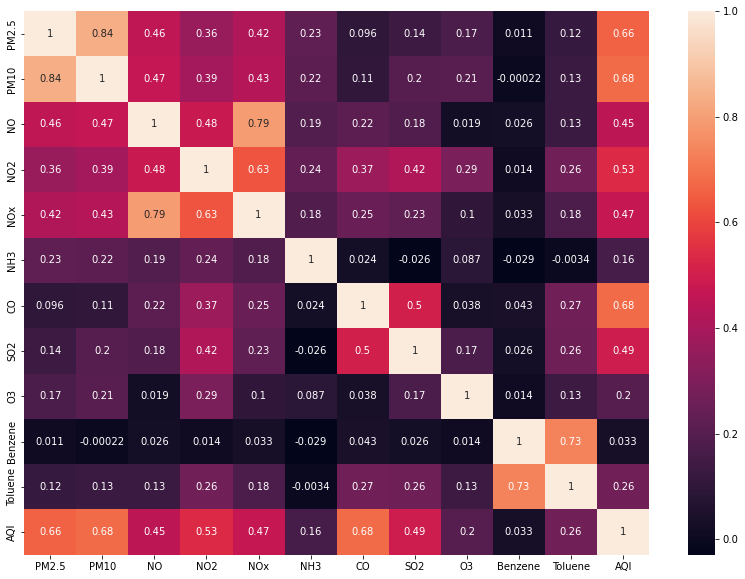

In [254]:
plt.rcParams['figure.figsize']=(14,10)
sns.heatmap(df1.corr(),annot=True)

<AxesSubplot:>

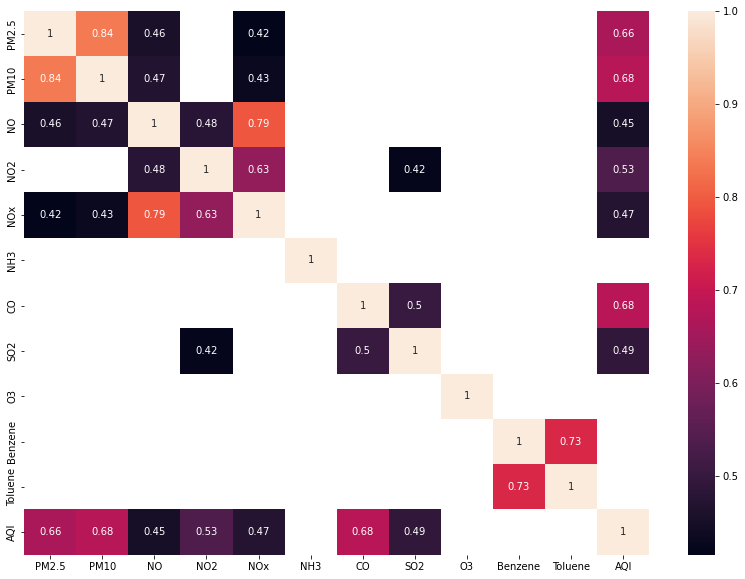

In [255]:
sns.heatmap(df1.corr()[(df1.corr()>0.4)|(df1.corr()<-0.4)],annot=True)

In [256]:
#Checking Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [257]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City,AQI_Bucket,day
0,83.13,191.370,6.93,28.71,33.72,6.350,6.93,49.52,59.76,0.02,0.00,209.0,Ahmedabad,Poor,weekday
1,79.84,199.052,13.85,28.68,41.08,12.860,13.85,48.49,97.07,0.04,0.00,328.0,Ahmedabad,Very Poor,weekday
2,94.52,119.556,24.39,32.66,52.61,7.492,24.39,67.39,111.33,0.24,0.01,514.0,Ahmedabad,Severe,Weekend
3,135.99,149.970,43.48,42.08,84.57,6.428,43.48,75.23,102.70,0.40,0.04,782.0,Ahmedabad,Severe,Weekend
4,178.33,154.718,54.56,35.31,72.80,7.260,54.56,55.04,107.38,0.46,0.06,914.0,Ahmedabad,Severe,weekday


In [258]:
df1_num=df1.select_dtypes('number')

In [259]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df1_num.values, i) for i in range(df1_num.shape[1])]
vif["Features"] = df1_num.columns
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,18.725627,AQI
1,12.411711,PM10
2,8.813719,PM2.5
3,7.094966,NOx
4,5.441546,NO2
5,4.805861,NO
6,4.320956,CO
7,3.283713,Toluene
8,3.196492,O3
9,2.647599,SO2


#Observation:

#1.The VIF score is significantly lesser than 10 for most of the Features

#2. PM10 has VIF score more than 10.

#2. There no Multicollinearity between the Features

# Statistical Test:

In [260]:
df1['AQI_Bucket'].unique()

array(['Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory', 'Good'],
      dtype=object)

#Null hypothesis- AQI and AQI Bucket are independent

#Alternate hypothesis- AQI and AQI Bucket are dependent


In [261]:
poor=df1[df1['AQI_Bucket']=='Poor']['AQI']
very_poor=df1[df1['AQI_Bucket']=='Very Poor']['AQI']
Severe=df1[df1['AQI_Bucket']=='Severe']['AQI']
Moderate=df1[df1['AQI_Bucket']=='Moderate']['AQI']
sat=df1[df1['AQI_Bucket']=='Satisfactory']['AQI']
good=df1[df1['AQI_Bucket']=='Good']['AQI']

In [262]:
from scipy import stats
stats.f_oneway(poor,very_poor,Severe,Moderate,sat,good)

F_onewayResult(statistic=21939.388580507733, pvalue=0.0)

#Observations:

#1. The pvalue is lesser than the significance value(0.05)

#2. so we reject the Null hypothesis.

#3. AQI and AQI-Bucket are dependent to each other.

In [263]:
df1['day'].unique()

array(['weekday', 'Weekend'], dtype=object)

#Null Hypothesis-day and AQI are independent 

#Alternative hypothesis-day and AQI are dependent

In [264]:
weekend=df1[df1['day']=='Weekend']['AQI']
weekday=df1[df1['day']=='weekday']['AQI']

In [265]:
stats.f_oneway(weekend,weekday)

F_onewayResult(statistic=1.7428762234763653, pvalue=0.1867869873422612)

#Observation:

#1. Pvalue is greater than the significance value(0.05)

#2. So we accept the Null hypothesis

#3. day and AQI have no dependency amoung each other.

In [266]:
df1['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

#Null Hypothesis-City and AQI are independent 

#Alternative hypothesis-City and AQI are dependent

In [267]:
Ahmedabad=df1[df1['City']=='Ahmedabad']['AQI']
Aizawl=df1[df1['City']=='Aizawl']['AQI']
Amaravati=df1[df1['City']=='Amaravati']['AQI']
Amritsar=df1[df1['City']=='Amritsar']['AQI']
Bengaluru=df1[df1['City']=='Bengaluru']['AQI']
Bhopal=df1[df1['City']=='Bhopal']['AQI']
Brajrajnagar=df1[df1['City']=='Brajrajnagar']['AQI']
Chandigarh=df1[df1['City']=='Chandigarh']['AQI']
Chennai=df1[df1['City']=='Chennai']['AQI']
Coimbatore=df1[df1['City']=='Coimbatore']['AQI']
Delhi=df1[df1['City']=='Delhi']['AQI']
Ernakulam=df1[df1['City']=='Ernakulam']['AQI']
Gurugram=df1[df1['City']=='Gurugram']['AQI']
Guwahati=df1[df1['City']=='Guwahati']['AQI']
Hyderabad=df1[df1['City']=='Hyderabad']['AQI']
Jaipur=df1[df1['City']=='Jaipur']['AQI']
Jorapokhar=df1[df1['City']=='Jorapokhar']['AQI']
Kochi=df1[df1['City']=='Kochi']['AQI']
Kolkata=df1[df1['City']=='Kolkata']['AQI']
Lucknow=df1[df1['City']=='Lucknow']['AQI']
Mumbai=df1[df1['City']=='Mumbai']['AQI']
Patna=df1[df1['City']=='Patna']['AQI']
Shillong=df1[df1['City']=='Shillong']['AQI']
Talcher=df1[df1['City']=='Talcher']['AQI']
Thiruvananthapuram=df1[df1['City']=='Thiruvananthapuram']['AQI']
Visakhapatnam=df1[df1['City']=='Visakhapatnam']['AQI']

In [268]:
stats.f_oneway(Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru,
       Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore,
       Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad,
       Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai,
       Patna, Shillong, Talcher, Thiruvananthapuram,
       Visakhapatnam)

F_onewayResult(statistic=677.7609457985197, pvalue=0.0)

#Observation:

#1. p-value is lesser than 0.05

#2. So we reject the null hypothesis

#3. City and AQI are dependent with each other.

In [269]:
import scipy.stats
c=[]
p=[]

In [270]:
#Parametric test for Numerical Features vs Target Variable:

#Null Hypothesis- PM2.5 and AQI are independent to each other

#Alternate Hypothesis- PM2.5 and AQI are dependent to each other

In [271]:
lists

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'O3',
 'Benzene',
 'Toluene']

In [272]:
for i in lists:
    corr,pvalue=scipy.stats.pearsonr(df1[i],df1['AQI'])
    p.append(pvalue)
    c.append(corr)    

In [273]:
stat_num=pd.DataFrame({'Correlation':c,'p-value':p})

In [274]:
stat_num.index=['PM2.5 VS AQI','PM10 VS AQI','NO VS AQI','NO2 VS AQI','NOx VS AQI','NH3 VS AQI','CO VS AQI','SO2 VS AQI',
                'O3 VS AQI','Benzene VS AQI','Toluene VS AQI']

In [275]:
stat_num

,Correlation,p-value
PM2.5 VS AQI,0.662159,0.000000e+00
PM10 VS AQI,0.678787,0.000000e+00
NO VS AQI,0.451895,0.000000e+00
NO2 VS AQI,0.534597,0.000000e+00
NOx VS AQI,0.472363,0.000000e+00
NH3 VS AQI,0.162863,5.360710e-147
CO VS AQI,0.680525,0.000000e+00
SO2 VS AQI,0.493015,0.000000e+00
O3 VS AQI,0.199950,4.865165e-222
Benzene VS AQI,0.032990,2.031046e-07


In [276]:
df1.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City,AQI_Bucket,day
0,83.13,191.370,6.93,28.71,33.72,6.350,6.93,49.52,59.76,0.02,0.00,209.0,Ahmedabad,Poor,weekday
1,79.84,199.052,13.85,28.68,41.08,12.860,13.85,48.49,97.07,0.04,0.00,328.0,Ahmedabad,Very Poor,weekday
2,94.52,119.556,24.39,32.66,52.61,7.492,24.39,67.39,111.33,0.24,0.01,514.0,Ahmedabad,Severe,Weekend
3,135.99,149.970,43.48,42.08,84.57,6.428,43.48,75.23,102.70,0.40,0.04,782.0,Ahmedabad,Severe,Weekend
4,178.33,154.718,54.56,35.31,72.80,7.260,54.56,55.04,107.38,0.46,0.06,914.0,Ahmedabad,Severe,weekday


In [277]:
df1.to_csv('Final_df.csv')

day
Weekend    48.350
weekday    48.825
Name: PM2.5, dtype: float64


<AxesSubplot:xlabel='day'>

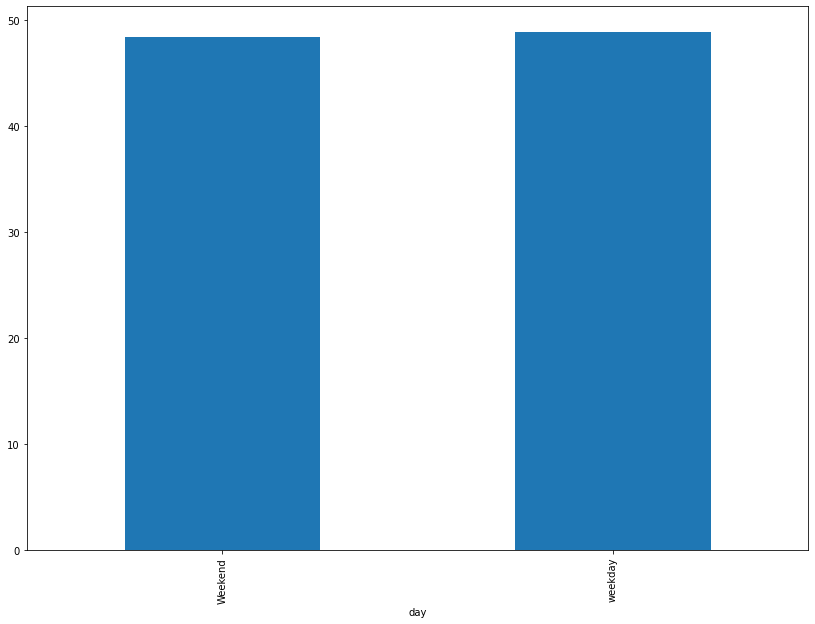

In [278]:
print(df1.groupby('day')['PM2.5'].median())
df1.groupby('day')['PM2.5'].median().plot(kind='bar')

In [280]:
#Observation:

#PM2.5 have no variation when compared it with the day's Feature

#This implies that the emision of PM2.5 is nearly same in weekdays and weekends

<AxesSubplot:xlabel='PM2.5', ylabel='PM10'>

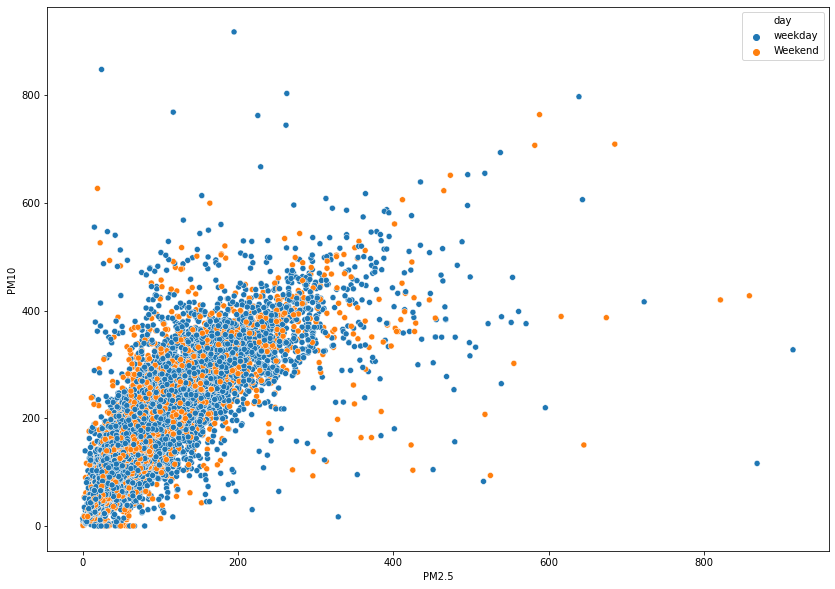

In [281]:
sns.scatterplot(df1['PM2.5'],df1['PM10'],hue=df1['day'])

In [285]:
df1['PM2.5'].corr(df1['PM10'])

0.8362881850724861

<AxesSubplot:xlabel='CO', ylabel='AQI'>

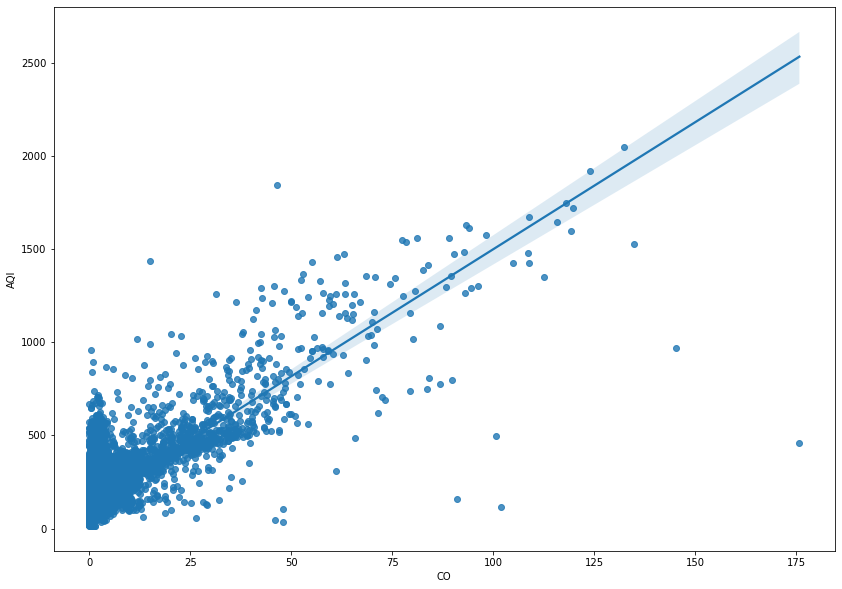

In [288]:
sns.regplot(df1['CO'],df1['AQI'])

In [287]:
df1.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
PM2.5,1.000000,0.836288,0.456153,0.363754,0.415473,0.226833,0.095802,0.138970,0.173038,0.011148,0.118290,0.662159
PM10,0.836288,1.000000,0.468764,0.389299,0.430410,0.219312,0.107278,0.202905,0.210375,-0.000222,0.129053,0.678787
NO,0.456153,0.468764,1.000000,0.479388,0.793818,0.188473,0.217624,0.184941,0.019039,0.025665,0.129205,0.451895
NO2,0.363754,0.389299,0.479388,1.000000,0.632221,0.235562,0.369944,0.420846,0.292191,0.014262,0.264800,0.534597
NOx,0.415473,0.430410,0.793818,0.632221,1.000000,0.184264,0.251892,0.225941,0.101083,0.033490,0.179627,0.472363
NH3,0.226833,0.219312,0.188473,0.235562,0.184264,1.000000,0.024237,-0.026130,0.086634,-0.029274,-0.003352,0.162863
CO,0.095802,0.107278,0.217624,0.369944,0.251892,0.024237,1.000000,0.503489,0.037804,0.042654,0.265865,0.680525
SO2,0.138970,0.202905,0.184941,0.420846,0.225941,-0.026130,0.503489,1.000000,0.174440,0.026493,0.259806,0.493015
O3,0.173038,0.210375,0.019039,0.292191,0.101083,0.086634,0.037804,0.174440,1.000000,0.014070,0.132041,0.199950
Benzene,0.011148,-0.000222,0.025665,0.014262,0.033490,-0.029274,0.042654,0.026493,0.014070,1.000000,0.734019,0.032990


<AxesSubplot:xlabel='NO2', ylabel='AQI'>

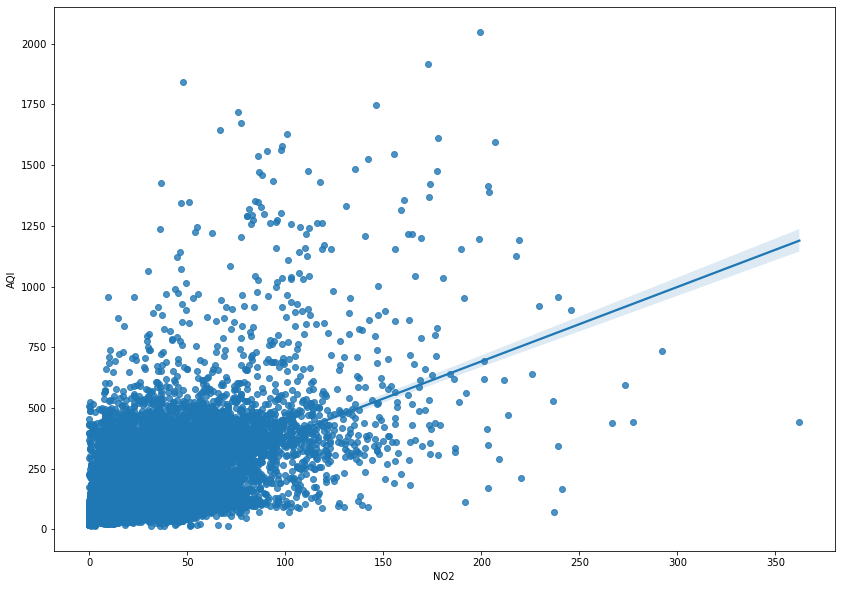

In [289]:
sns.regplot(df1['NO2'],df1['AQI'])

<AxesSubplot:xlabel='SO2', ylabel='AQI'>

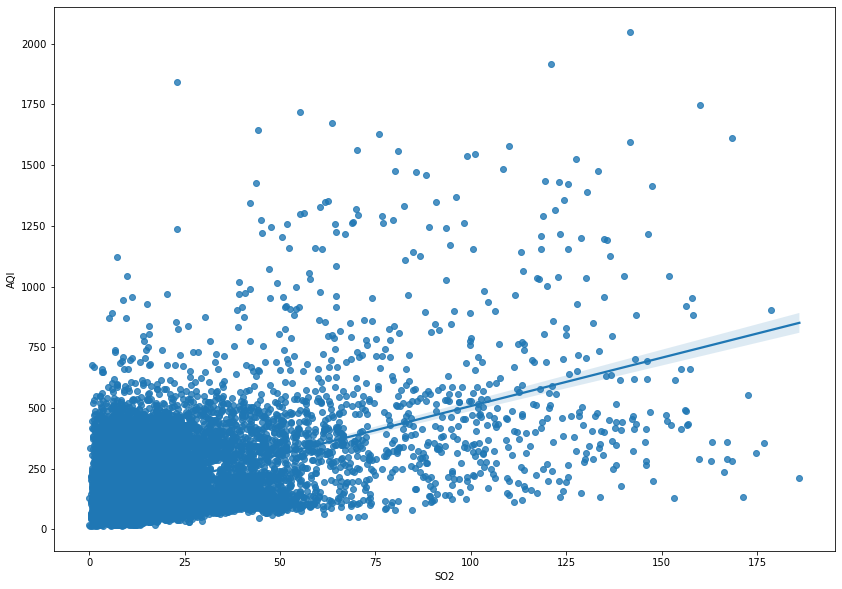

In [290]:
sns.regplot(df1['SO2'],df1['AQI'])

<AxesSubplot:>

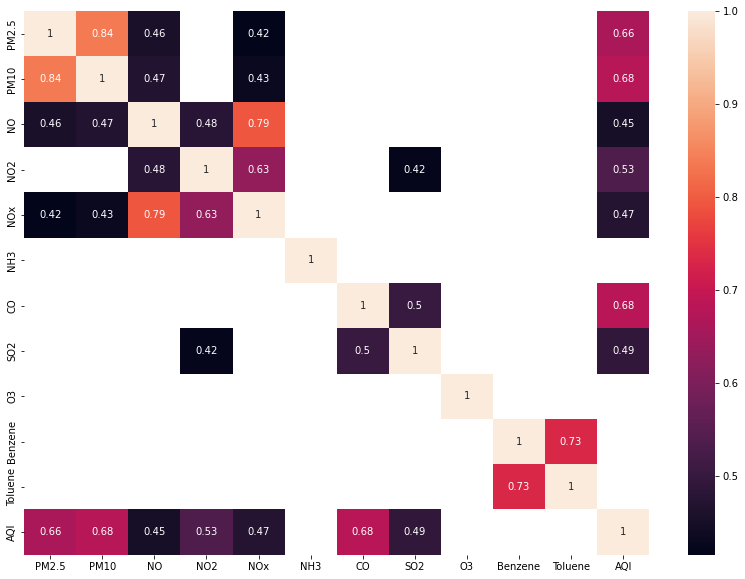

In [294]:
sns.heatmap(df1.corr()[(df1.corr()>0.4)|(df1.corr()<-0.4)],annot=True)

# Observations - Summary:

- The dataset has 29531 observations and 16 attributes
- Date attribute feature engineered into a categorical column (weekend/weekday) for further analysis.
- Null values treated by iterative imputer. Since within cities daywise there is a good correlation, choosing to go with Iterative imputer
- Xylene column dropped form the analysis due to presence of 61% NA values. If imputed, there is a high chance that it might skew the distribution and make significant impact on the end results.

- Upon univariate analysis, all the pollutants are observed to be heavily right skewed in their distribution.
- Almost all the data collected are from Tier- I cities; Tier - II cities few.
- Most of the observations (ie) 68% of the observation are Moderatly polluted and Satisfactory polluted.
- Remaining 32% of the observation are poor,Very poor,Severe and Good
- Nearly 70% of the data are observed in the weekdays and 30% are observed in the weekends
- In the weekends the moderate and satisfactory are levels are in higher numbers
- In the weekends the severe class is relatively lesser when compared to other classes. This may vary depending on the      cities. During weekdays the moderate and satisfactory are higher
- Ahmedabad,Delhi,patna,Lucknow and Gurugram has recorded high pollution compared to the other areas.
- Amaravati has recorded more Good level of pollution.
- Delhi recorded frequent poor ,very poor level of pollution.
- Bengaluru recorded frequent satisfactory level of pollution and it has 0 severe condition.
- PM2.5 and PM10 shows a near linear relationship; has a correlation score of 0.84  
- CO and AQI shows a good linear relationship. There is a significant margin between the severe and good pollutions levels in terms of CO.
- Amoung all the Numerical variables, Benzene variable has very low correlation between the independent and the dependent feature.
- PM2.5 have no variation when compared it with the day's Feature. This implies that the emision of PM2.5 is nearly same in weekdays and weekends
- Emission of PM2.5 for Delhi is higher when compared to the other Cities 
- Patna, Gurugram, Lucknow has the next highest PM2.5 value.
- Severe level of pollution is very high in Ahmedabad compared to other cities.
- Delhi has the very high frequency occurrence of poor , very poor and moderate conditions.
- Severe level of pollution is recorded when CO is above 1.7 
- Severe level of pollution is recorded when Toluene above 7.6
- Presence of Outliers are common underlying challenge in every Feature
- Most of the Features shows a positive Linear Relationship with the response variable.
- Patna has the highest mean amount of PM2.5 particulate matter closely followed by Delhi and Gurugram.
- Surprisingly metropolitan cities like Bengaluru, Chennai, Mumbai have less PM2.5 than mean of the observations.
- Aizwal recorded the least contaminated with PM2.5; One plausible explanation could be least penetration of industries and other related activities.
- coimbatore,Delhi, Gurugram find themselves in the top three positions where polluted by PM10
- Here again, metro cities Bengaluru, Chennai, Mumbai record less than the mean of the observations, which is an interesting point to note.
- Ahmedabad, Delhi,Jorapokhar,Patna & Talcher have recorded higher than the mean of SO2 of the observations across cities. 
- Cities Ernakulam, Thiruvananthapuram, AIzwal have recorded considerably less contamination with SO2
- From the multivariate analysis, separation between classes , the linear increase in AQI with increase in pollutant level is significantly visible from the plot. Level of Pollution is significantly increases as the pollutant PM2.5 and PM10 increases
- When carbon monoxide is greater than 35 the pollution level becomes severe. 
- Clear pattern can be seen when CO increases the AQI index increases.
- on correlation between features - Corr (PM2.5,PM10) – 0.84 ; Corr (NOx , NO) – 0.79 ; Corr (Benzene,Toluene) – 0.73.
- Correlation between other features are less appreciable; Benzene is least correlated when compared to other pollutants
- Statistical tests indicate that all the variables exhibit pval less than the assigned significance level of 0.05, indicating their significance in the analysis.